In [1]:
import models
import cms_datasets as cms
import plotting

Using TensorFlow backend.


In [2]:
reload(cms)

data,mc = cms.load_zee("moriond_v9","abs(ScEta) < 1.5")


In [3]:
data.columns

Index(['index', 'run', 'rho', 'nvtx', 'mass', 'weight', 'SigMoM', 'Pt',
       'ScEta', 'Phi', 'R9', 'S4', 'SigmaIeIe', 'EtaWidth', 'PhiWidth',
       'CovarianceIphiIphi', 'SigmaRR', 'ScEnergy', 'CovarianceIetaIphi',
       'PhoIso03', 'ChIso03', 'ChIso03worst', 'ScPreshowerEnergy', 'PhoIDMVA',
       'SigEOverE', 'run_quantile'],
      dtype='object')

In [4]:
mc.columns

Index(['index', 'run', 'rho', 'nvtx', 'mass', 'weight', 'SigMoM', 'Pt',
       'ScEta', 'Phi', 'R9', 'S4', 'SigmaIeIe', 'EtaWidth', 'PhiWidth',
       'CovarianceIphiIphi', 'SigmaRR', 'ScEnergy', 'CovarianceIetaIphi',
       'PhoIso03', 'ChIso03', 'ChIso03worst', 'ScPreshowerEnergy', 'PhoIDMVA',
       'SigEOverE'],
      dtype='object')

In [5]:
c_names = ['Pt','ScEta','Phi','rho']
x_names = ['R9','SigmaIeIe','S4','EtaWidth','PhiWidth','CovarianceIetaIphi',
           'CovarianceIphiIphi', ]

data_c = data[c_names]
data_x = data[x_names]

mc_c = mc[c_names]
mc_x = mc[x_names]


In [6]:
data_x.columns, data_x.shape, data_c.columns, data_c.shape

(Index(['R9', 'SigmaIeIe', 'S4', 'EtaWidth', 'PhiWidth', 'CovarianceIetaIphi',
        'CovarianceIphiIphi'],
       dtype='object'),
 (17520217, 7),
 Index(['Pt', 'ScEta', 'Phi', 'rho'], dtype='object'),
 (17520217, 4))

In [7]:
data_x.columns, data_c.columns

(Index(['R9', 'SigmaIeIe', 'S4', 'EtaWidth', 'PhiWidth', 'CovarianceIetaIphi',
        'CovarianceIphiIphi'],
       dtype='object'), Index(['Pt', 'ScEta', 'Phi', 'rho'], dtype='object'))

In [8]:
mc_x.columns, mc_c.columns

(Index(['R9', 'SigmaIeIe', 'S4', 'EtaWidth', 'PhiWidth', 'CovarianceIetaIphi',
        'CovarianceIphiIphi'],
       dtype='object'), Index(['Pt', 'ScEta', 'Phi', 'rho'], dtype='object'))

In [9]:
reload(models)

xz_shape = (1,len(x_names))
c_shape = (1,len(c_names))
gan = models.MyFFGAN( xz_shape, xz_shape, c_shape=c_shape,
                     g_opts=dict(name="G_64x5",kernel_sizes=[64]*5,
                         # name="G_32x3_64x3_128x3",kernel_sizes=[128]*3+[64]*3+[32]*3,#kernel_sizes=[128]*11,
#                                 do_nl_activ=[False,"tanh"]*3+[False],
#                                 do_poly=True,
#                                 do_nl_activ="relu",do_skip=False, do_bn=True
                                ),
                     d_opts=dict(name="D_256x5",kernel_sizes=[256]*5),
#                     dm_opts=dict(optimizer=models.Adam,opt_kwargs=dict(lr=1e-5)),
#                     am_opts=dict(optimizer=models.Adam,opt_kwargs=dict(lr=1e-5)),
                      dm_opts=dict(optimizer=models.RMSprop,opt_kwargs=dict(lr=0.0002, decay=6e-6)),
                      am_opts=dict(optimizer=models.RMSprop,opt_kwargs=dict(lr=0.0002, decay=6e-6)),

                    )

In [10]:
gan.get_generator()

(1, 7)


In [11]:
gan.get_discriminator()

In [12]:
gan.adversarial_compile()

In [13]:
gan.get_generator().summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
G_64x5_c_input (InputLayer)      (None, 1, 4)          0                                            
____________________________________________________________________________________________________
G_64x5_input (InputLayer)        (None, 1, 7)          0                                            
____________________________________________________________________________________________________
G_64x5_all_inputs (Concatenate)  (None, 1, 11)         0           G_64x5_c_input[0][0]             
                                                                   G_64x5_input[0][0]               
____________________________________________________________________________________________________
G_64x5_up1_dense (Dense)         (None, 1, 64)         768         G_64x5_all_inputs[0][0] 

In [14]:
gan.get_discriminator().summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
D_256x5_c_input (InputLayer)     (None, 1, 4)          0                                            
____________________________________________________________________________________________________
D_256x5_input (InputLayer)       (None, 1, 7)          0                                            
____________________________________________________________________________________________________
D_256x5_all_inputs (Concatenate) (None, 1, 11)         0           D_256x5_c_input[0][0]            
                                                                   D_256x5_input[0][0]              
____________________________________________________________________________________________________
D_256x5_down1_dense (Dense)      (None, 1, 256)        3072        D_256x5_all_inputs[0][0]

In [15]:
gan.am.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
G_64x5_c_input (InputLayer)      (None, 1, 4)          0                                            
____________________________________________________________________________________________________
G_64x5_input (InputLayer)        (None, 1, 7)          0                                            
____________________________________________________________________________________________________
G_64x5_all_inputs (Concatenate)  (None, 1, 11)         0           G_64x5_c_input[0][0]             
                                                                   G_64x5_input[0][0]               
____________________________________________________________________________________________________
G_64x5_up1_dense (Dense)         (None, 1, 64)         768         G_64x5_all_inputs[0][0] 

In [16]:
gan.dm.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
D_256x5_c_input (InputLayer)     (None, 1, 4)          0                                            
____________________________________________________________________________________________________
D_256x5_input (InputLayer)       (None, 1, 7)          0                                            
____________________________________________________________________________________________________
D_256x5_all_inputs (Concatenate) (None, 1, 11)         0           D_256x5_c_input[0][0]            
                                                                   D_256x5_input[0][0]              
____________________________________________________________________________________________________
D_256x5_down1_dense (Dense)      (None, 1, 256)        3072        D_256x5_all_inputs[0][0]

In [17]:
gan.gan.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
G_64x5_c_input (InputLayer)      (None, 1, 4)          0                                            
____________________________________________________________________________________________________
G_64x5_input (InputLayer)        (None, 1, 7)          0                                            
____________________________________________________________________________________________________
G_64x5_all_inputs (Concatenate)  (None, 1, 11)         0           G_64x5_c_input[0][0]             
                                                                   G_64x5_input[0][0]               
____________________________________________________________________________________________________
D_256x5_c_input (InputLayer)     (None, 1, 4)          0                                   

In [18]:
gan.gan.outputs, gan.gan.inputs

([<tf.Tensor 'model_2/D_256x5_output/Sigmoid:0' shape=(?, 1) dtype=float32>,
  <tf.Tensor 'D_256x5_output/Sigmoid:0' shape=(?, 1) dtype=float32>],
 [<tf.Tensor 'G_64x5_c_input:0' shape=(?, 1, 4) dtype=float32>,
  <tf.Tensor 'G_64x5_input:0' shape=(?, 1, 7) dtype=float32>,
  <tf.Tensor 'D_256x5_c_input:0' shape=(?, 1, 4) dtype=float32>,
  <tf.Tensor 'D_256x5_input:0' shape=(?, 1, 7) dtype=float32>])

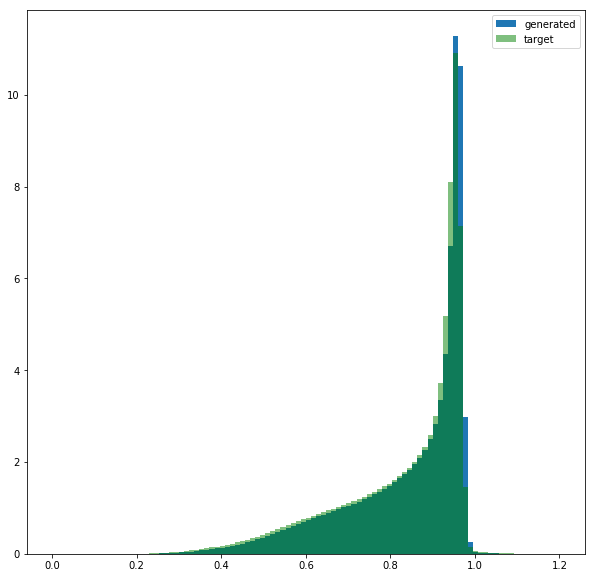

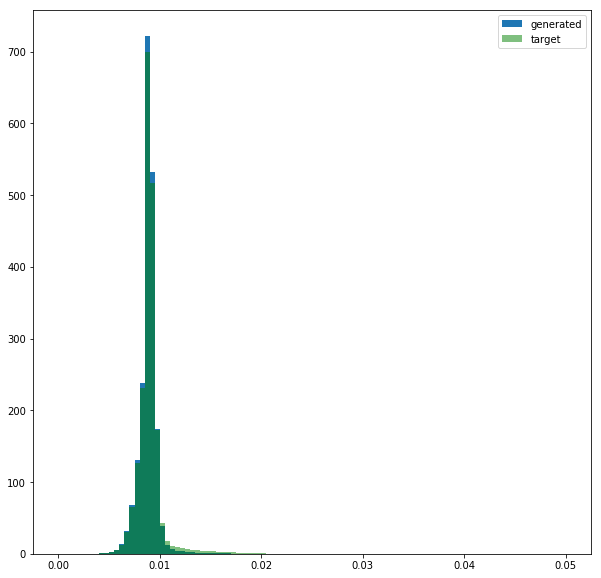

In [19]:
plotting.plot_hists(data_x.values[:,0],mc_x.values[:,0],bins=100,range=[0,1.2])
plt.show()
plotting.plot_hists(data_x.values[:,1],mc_x.values[:,1],bins=100,range=[0,5e-2])

In [20]:
# from sklearn.preprocessing import RobustScaler, MinMaxScaler, QuantileTransformer
# scaler_x = QuantileTransformer(output_distribution='normal')
# # scaler_mc = QuantileTransformer(output_distribution='normal')

# scaler_c = QuantileTransformer(output_distribution='normal')

# mc_x = scaler_x.fit_transform(mc_x).reshape(-1,1,len(x_names))
# data_x = scaler_x.transform(data_x).reshape(-1,1,len(x_names))

# mc_c = scaler_c.fit_transform(mc_c).reshape(-1,1,len(c_names))
# data_c = scaler_c.transform(data_c).reshape(-1,1,len(c_names))

import preprocessing
reload(preprocessing)

data_x,data_c,mc_x,mc_c,scaler_x,scaler_c = preprocessing.transform(data_x,data_c,mc_x,mc_c)


In [21]:
data_x.shape,mc_x.shape

((17520217, 1, 7), (9616192, 1, 7))

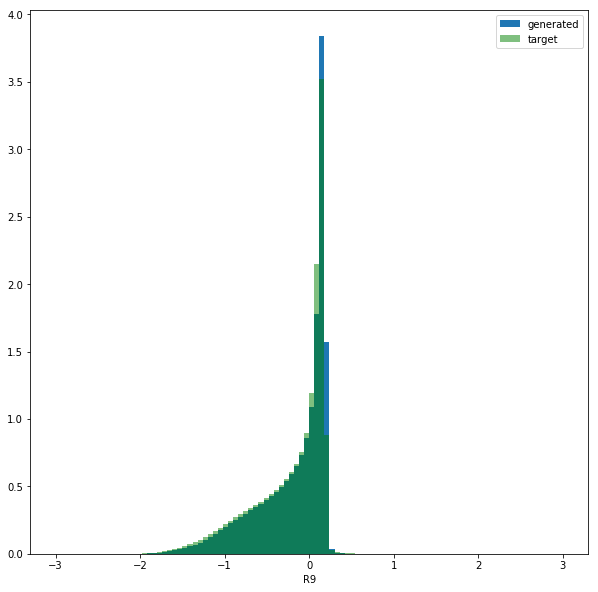

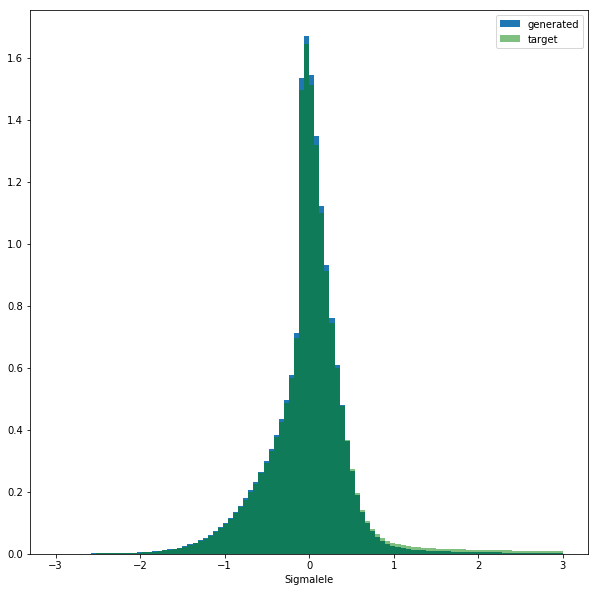

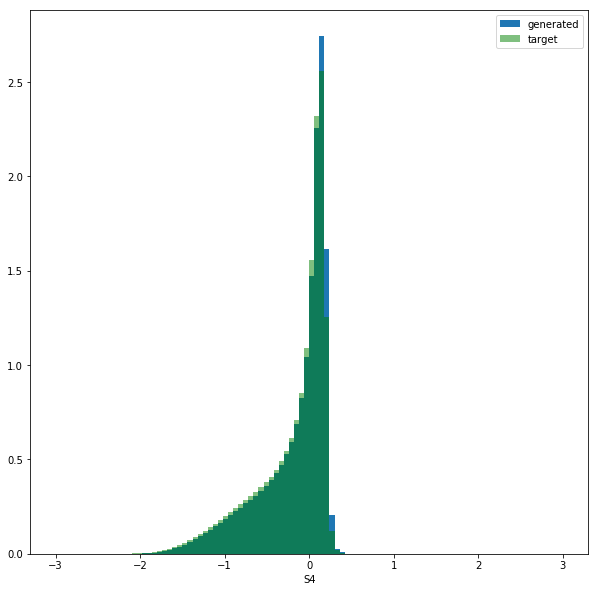

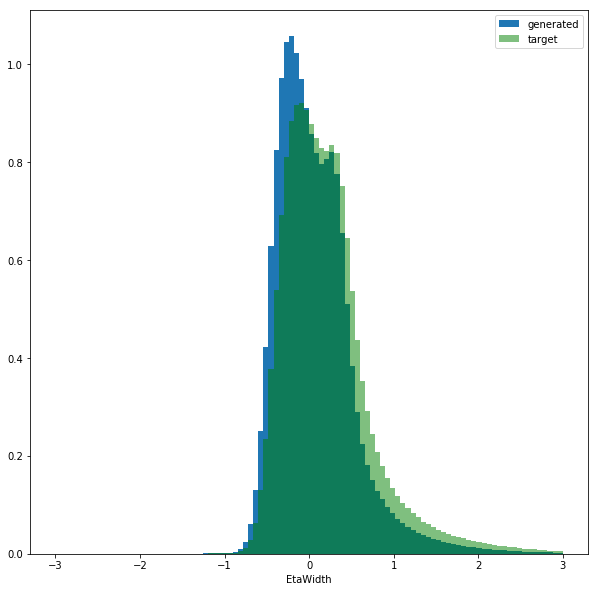

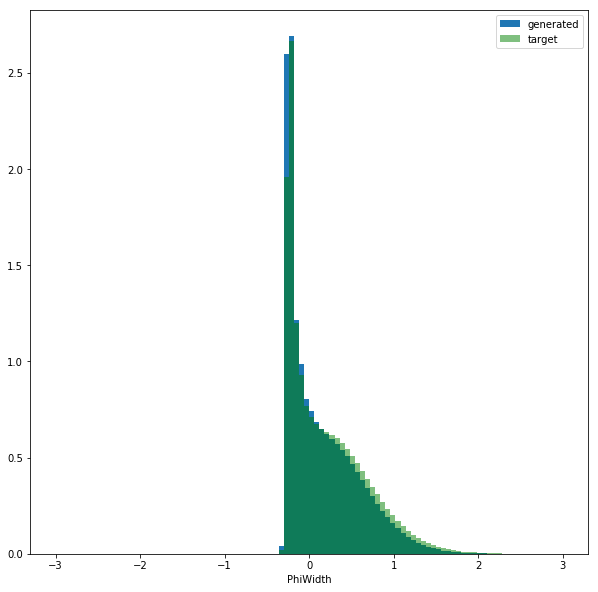

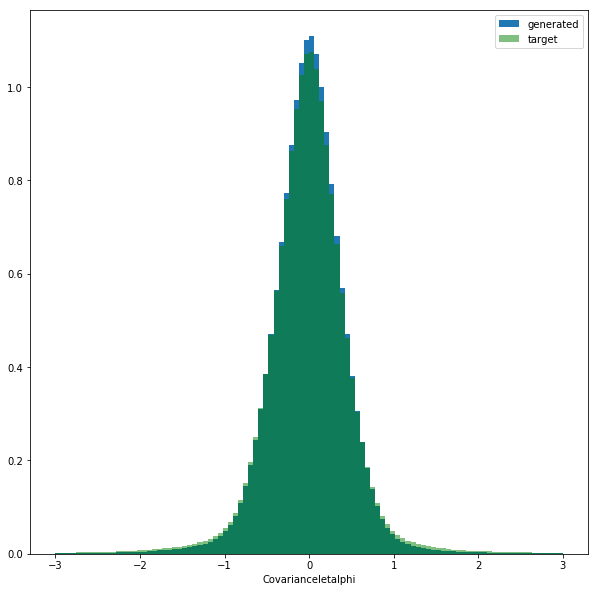

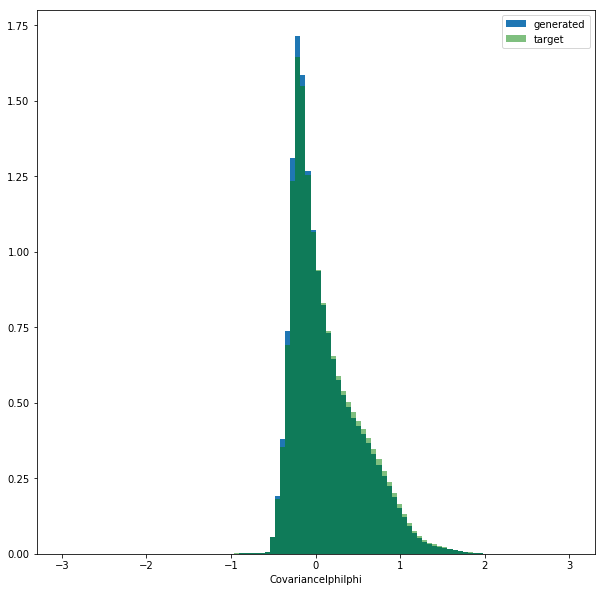

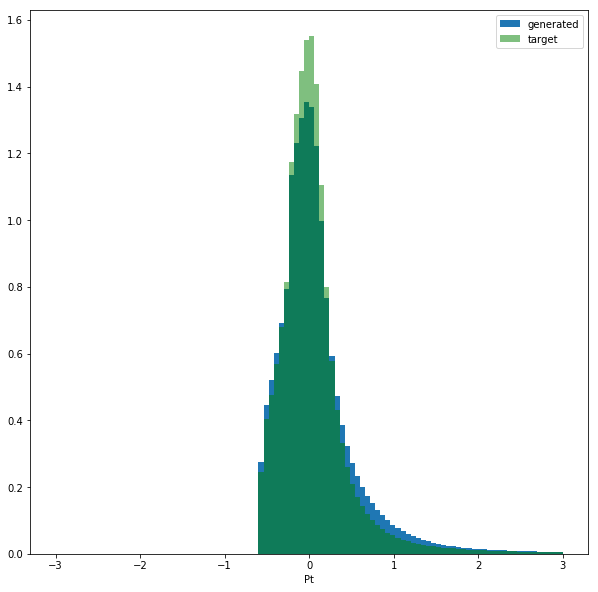

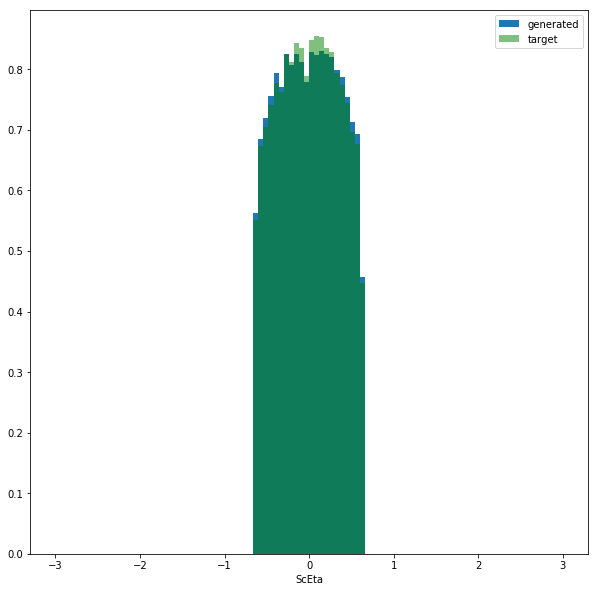

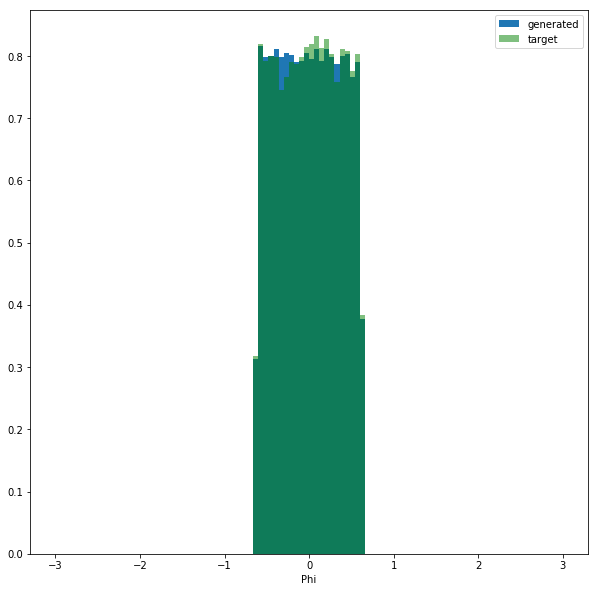

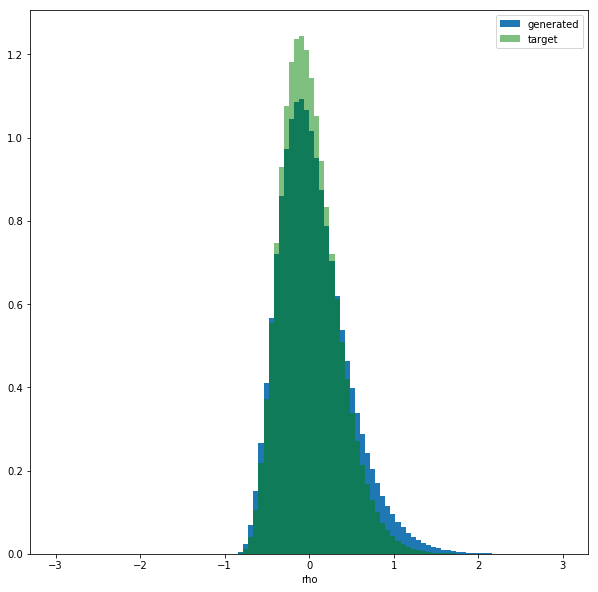

In [22]:
for ix in range(len(x_names)):
    plotting.plot_hists(data_x[:,0,ix],mc_x[:,0,ix],bins=100,range=[-3,3])
    plt.xlabel(x_names[ix])
    plt.show()

for ic in range(len(c_names)):
    plotting.plot_hists(data_c[:,0,ic],mc_c[:,0,ic],bins=100,range=[-3,3])
    plt.xlabel(c_names[ic])
    plt.show()


In [23]:
nmax = min(data_x.shape[0]//10,mc_x.shape[0])

data_x_train,data_x_test,data_c_train,data_c_test = cms.train_test_split(data_x[:nmax],data_c[:nmax])
mc_x_train,mc_x_test,mc_c_train,mc_c_test = cms.train_test_split(mc_x[:nmax],mc_c[:nmax])

In [24]:
print(nmax)

1752021


Epoch 1/10
   4096/1314015 [..............................] - ETA: 41s - loss: 2.8211 - generator_loss: 1.4519 - generator_model_2_loss: 0.7217 - generator_D_256x5_output_loss: 0.7303 - discriminator_loss: 1.3692 - discriminator_model_2_loss: 0.6935 - discriminator_D_256x5_output_loss: 0.6757

/users/musella/jupyter/GAN/base.py:122: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  callbacks = [plotter]


1310720/1314015 [============================>.] - ETA: 0s - loss: 2.8211 - generator_loss: 1.4576 - generator_model_2_loss: 0.7330 - generator_D_256x5_output_loss: 0.7246 - discriminator_loss: 1.3635 - discriminator_model_2_loss: 0.6824 - discriminator_D_256x5_output_loss: 0.6811aaaaaaaaaaaaaaaaaaaa  0


/users/musella/my-env/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6201: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()
/users/musella/jupyter/GAN/plotting.py:51: RuntimeWarning: invalid value encountered in true_divide
  target_hist/norm,
/users/musella/jupyter/GAN/plotting.py:54: RuntimeWarning: invalid value encountered in true_divide
  yerr=np.sqrt(target_hist)/norm,


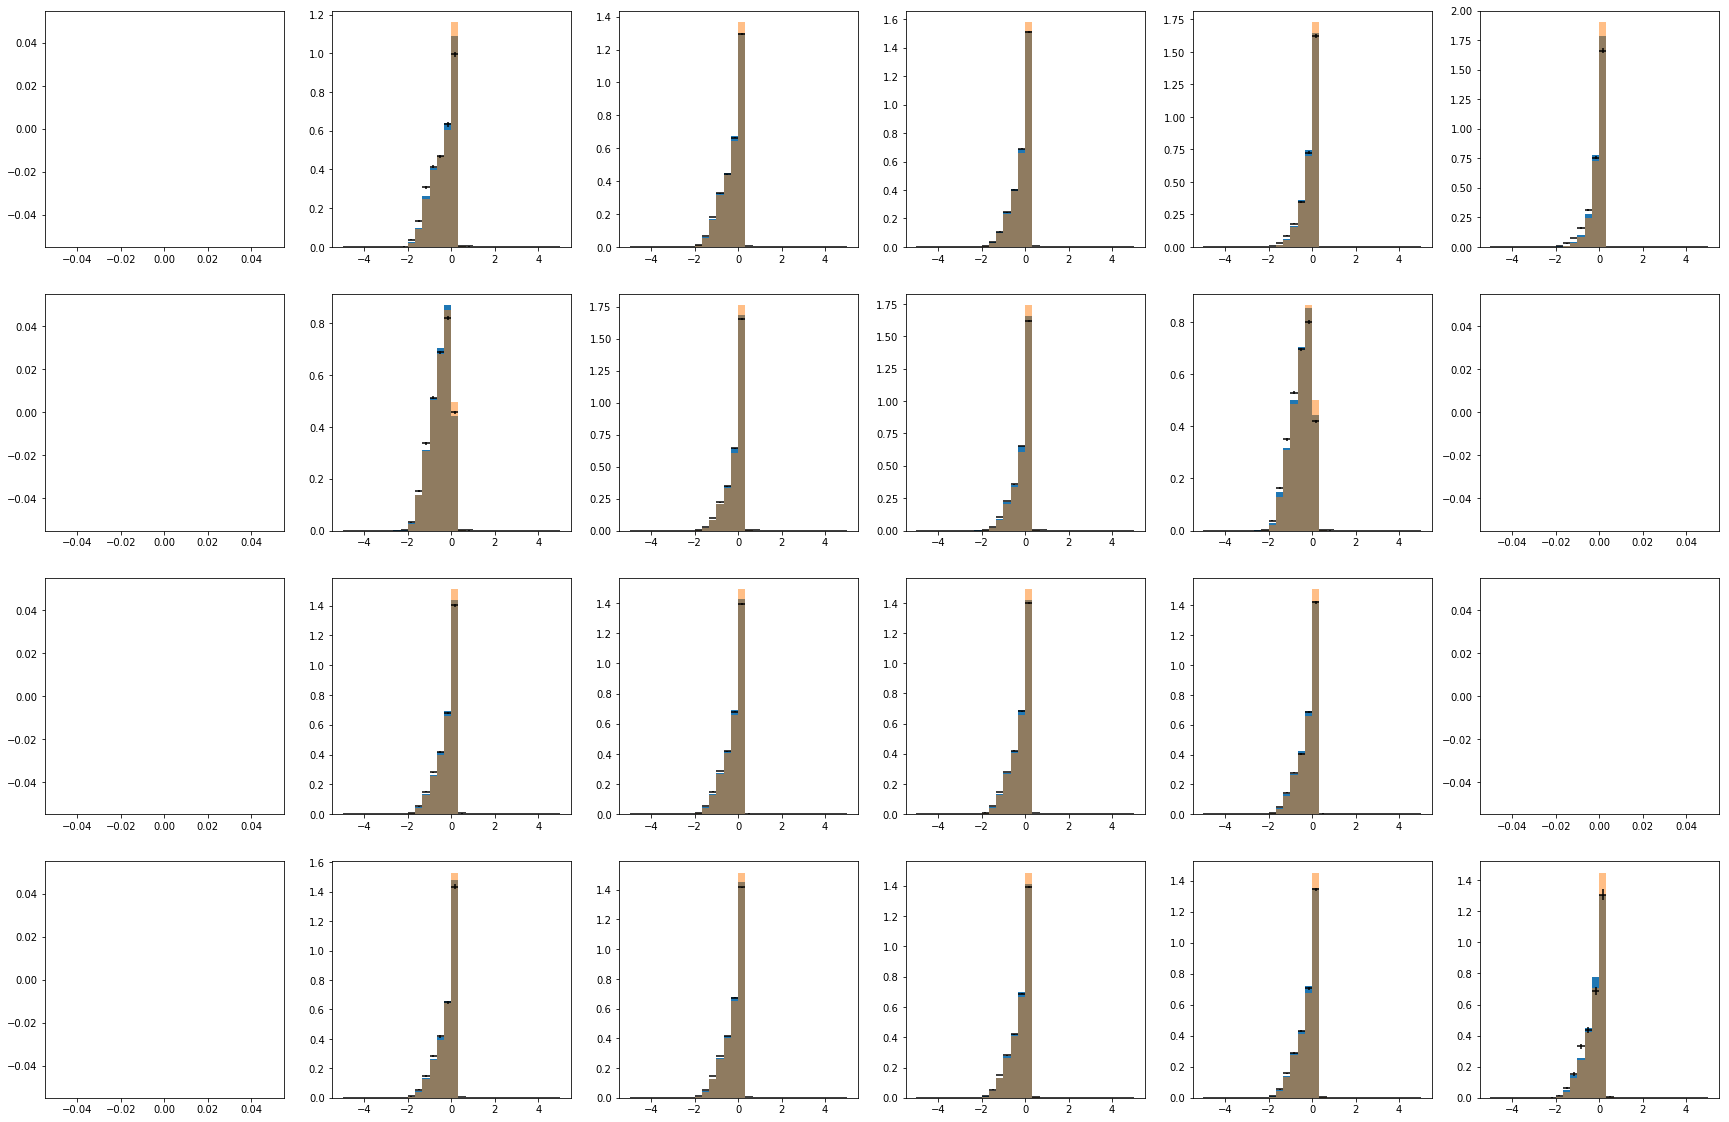

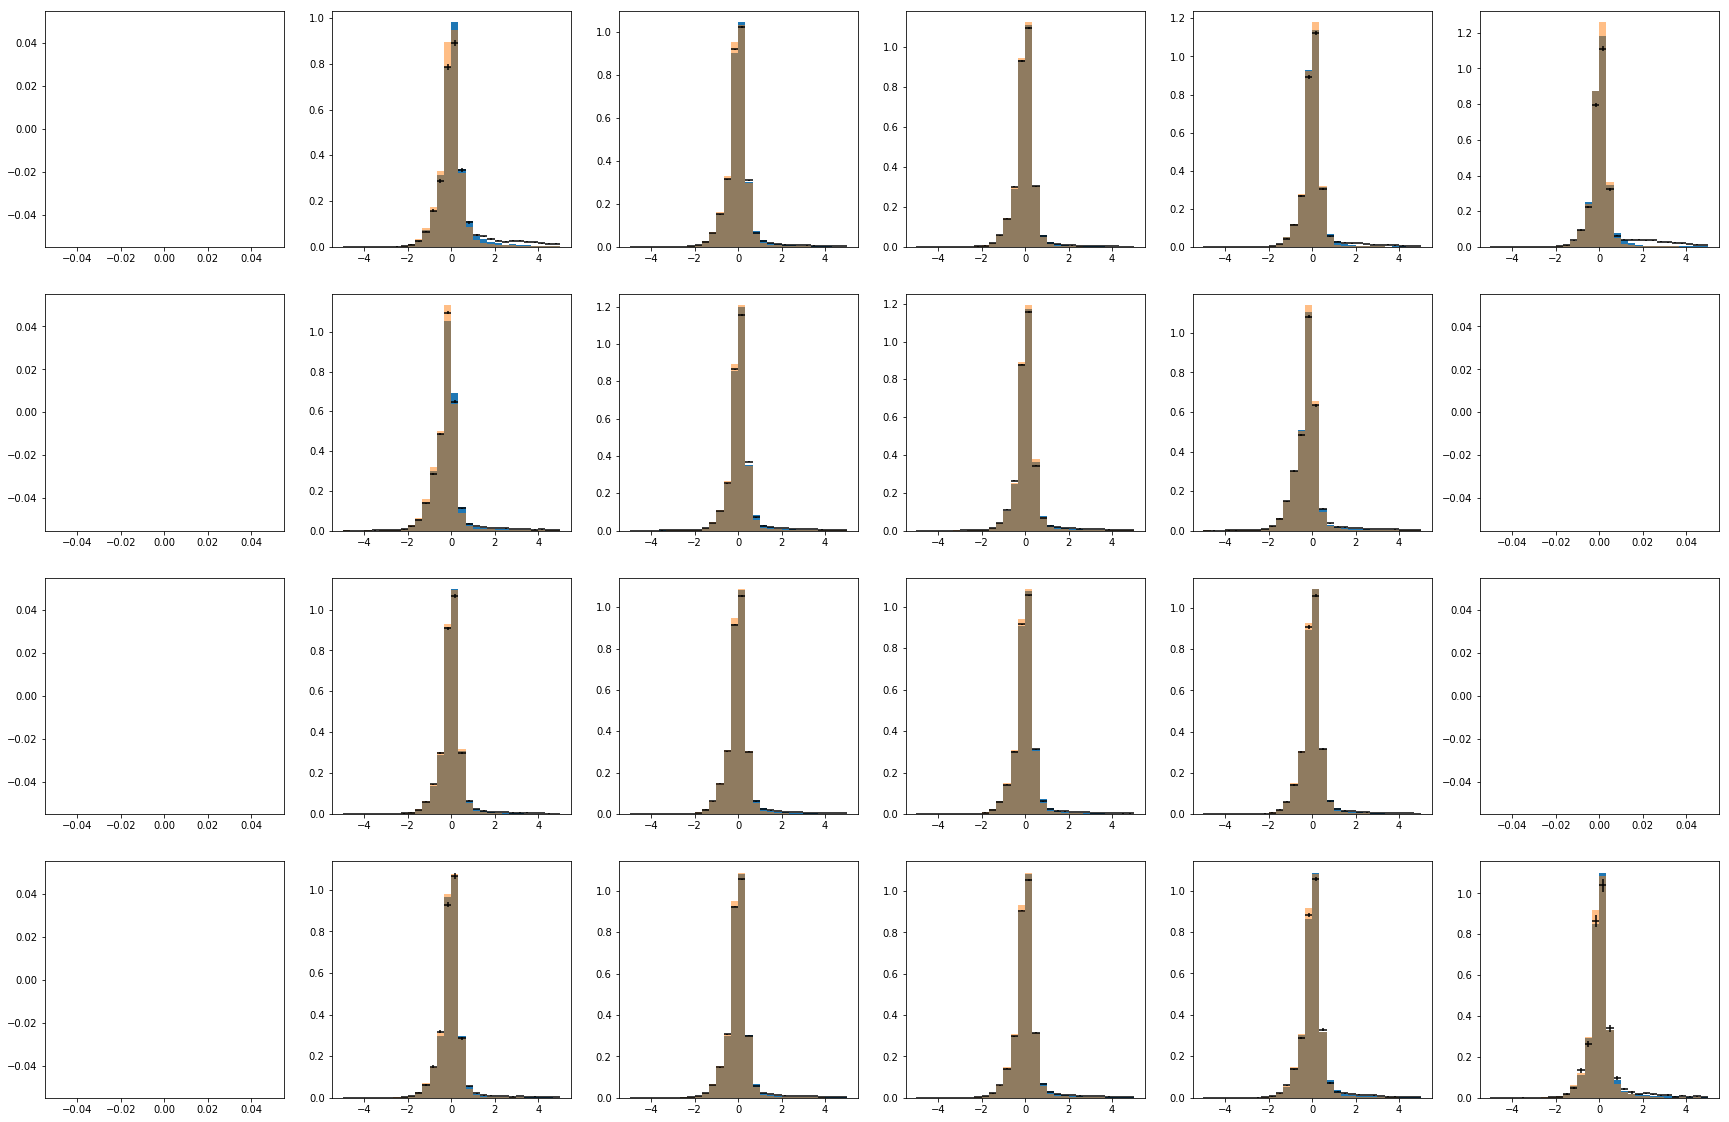

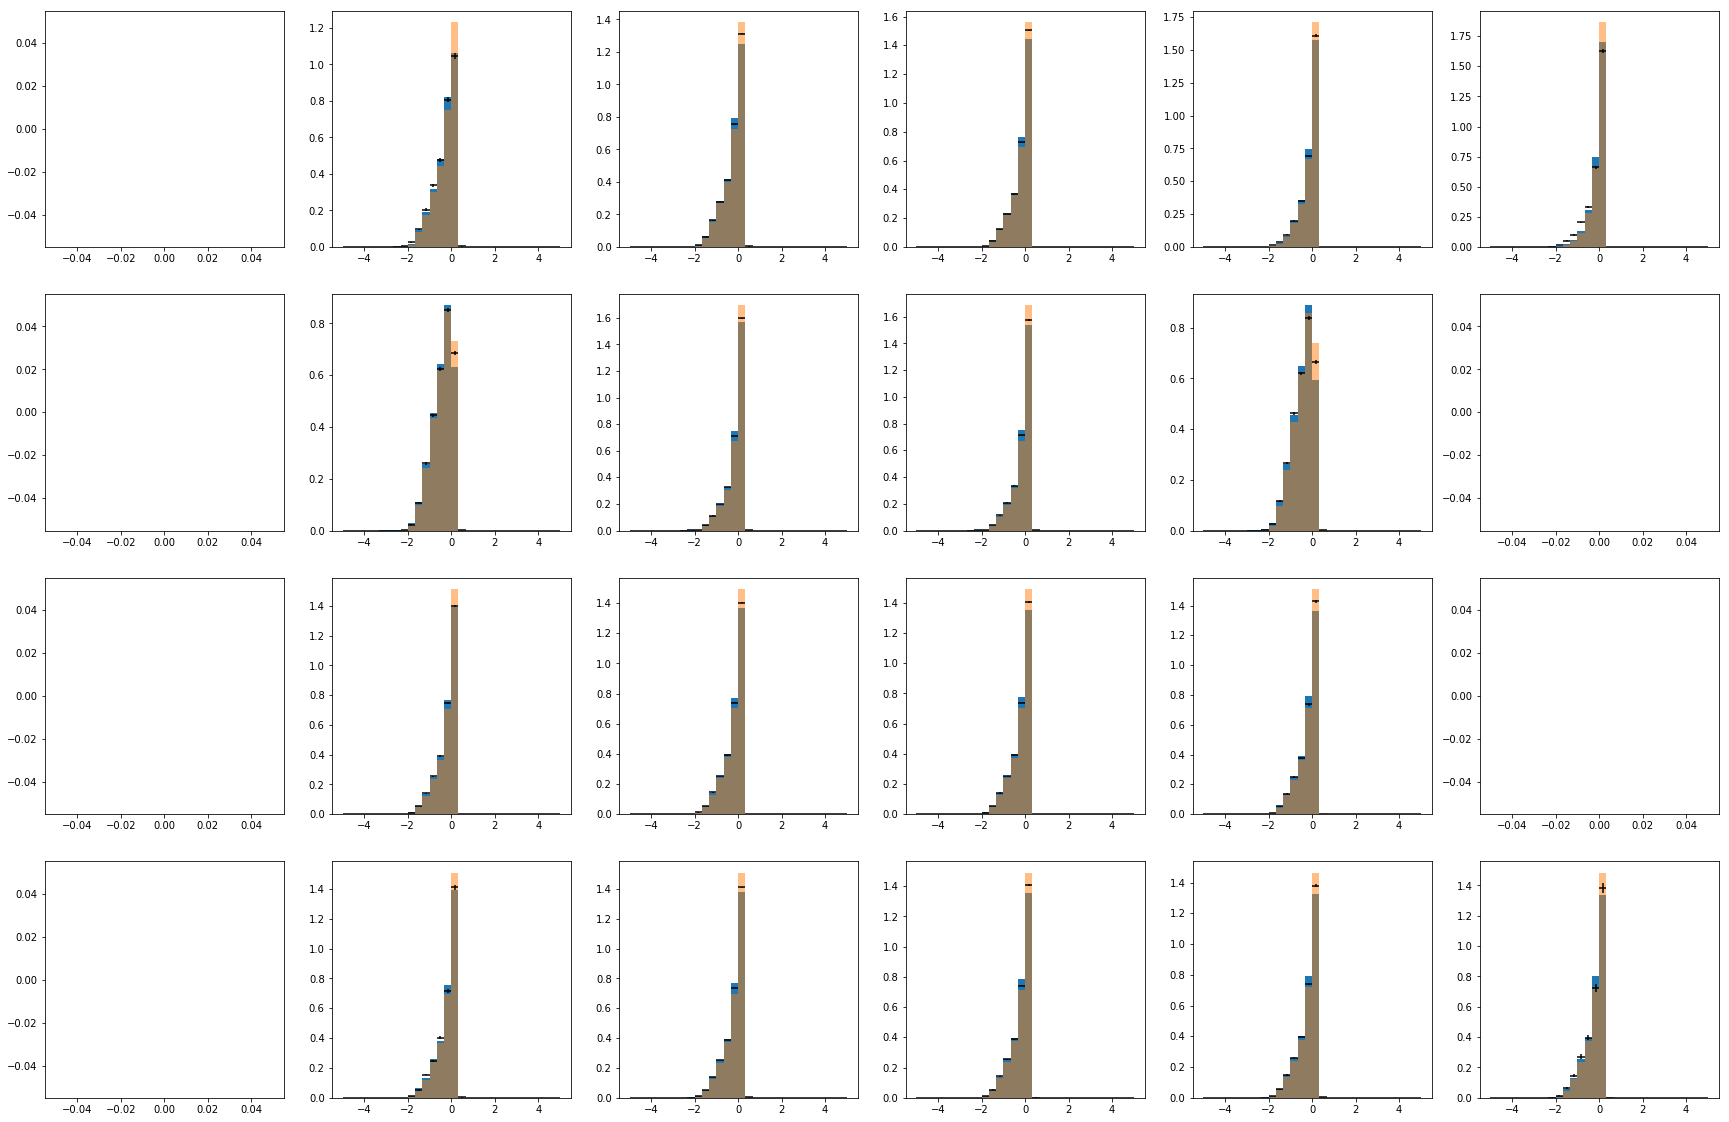

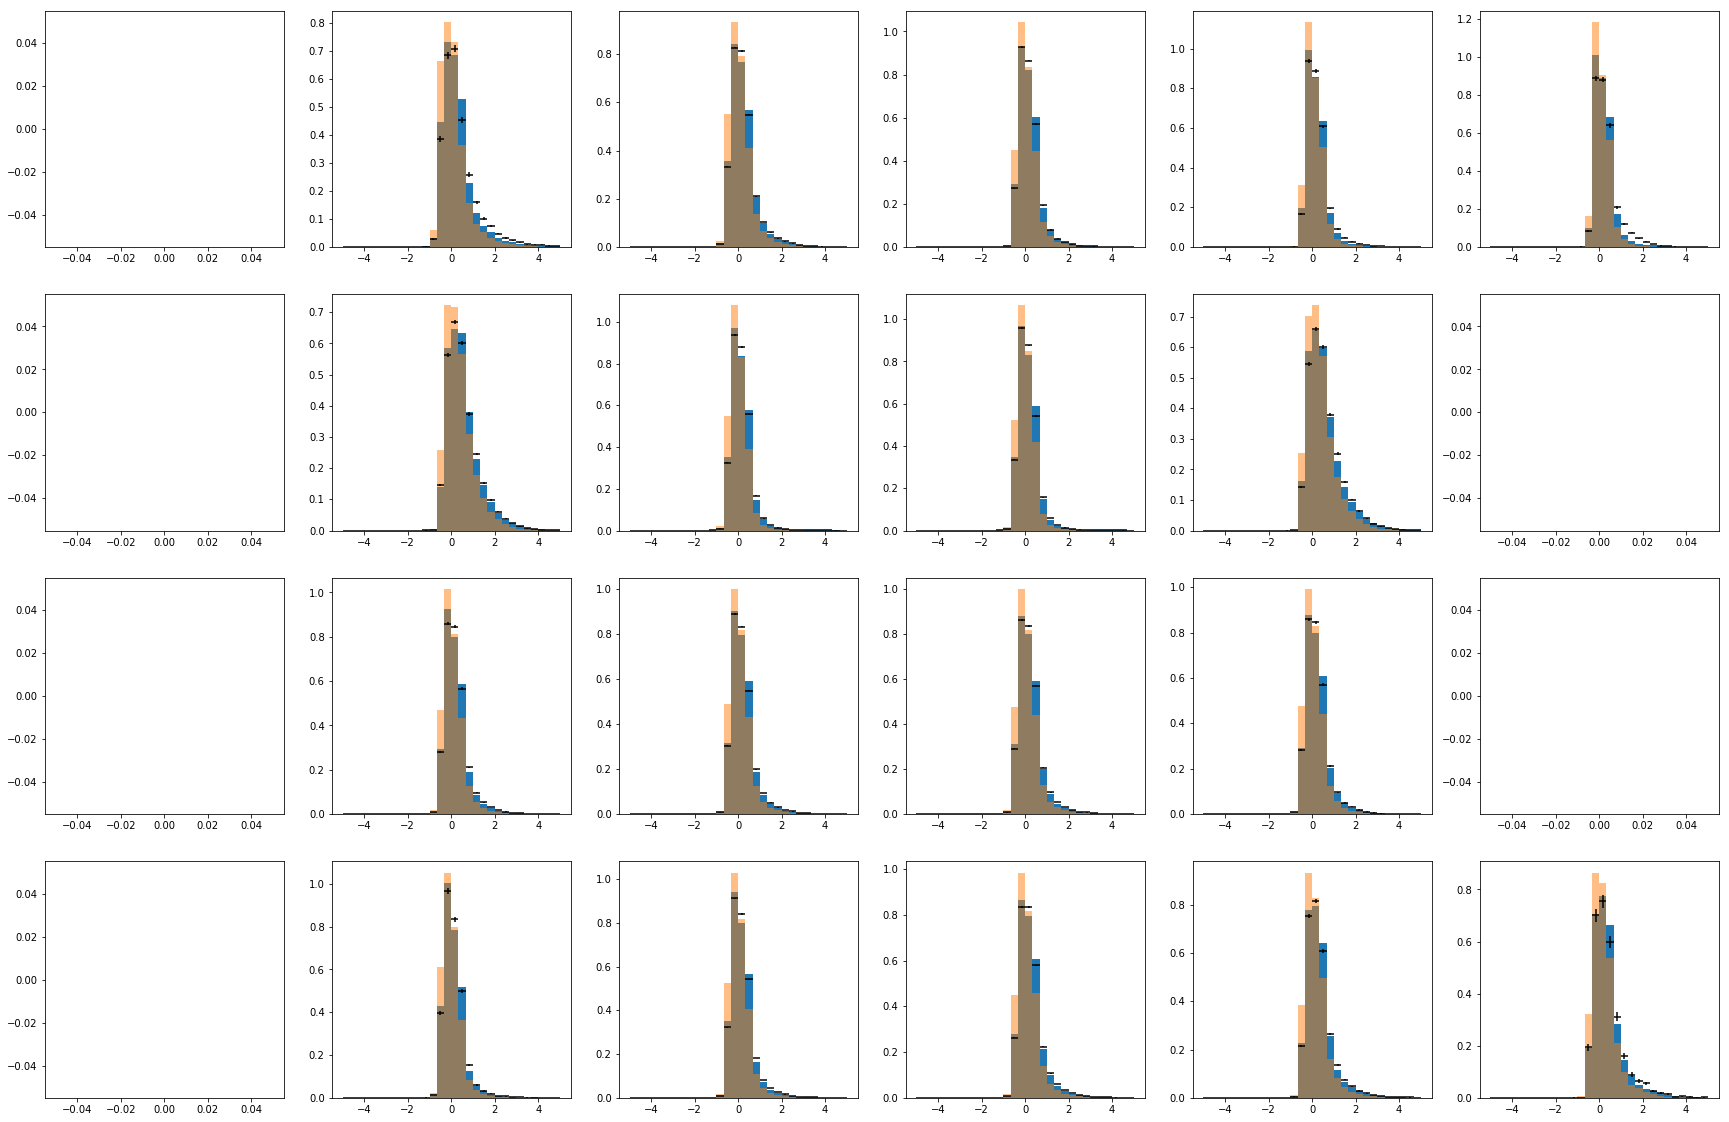

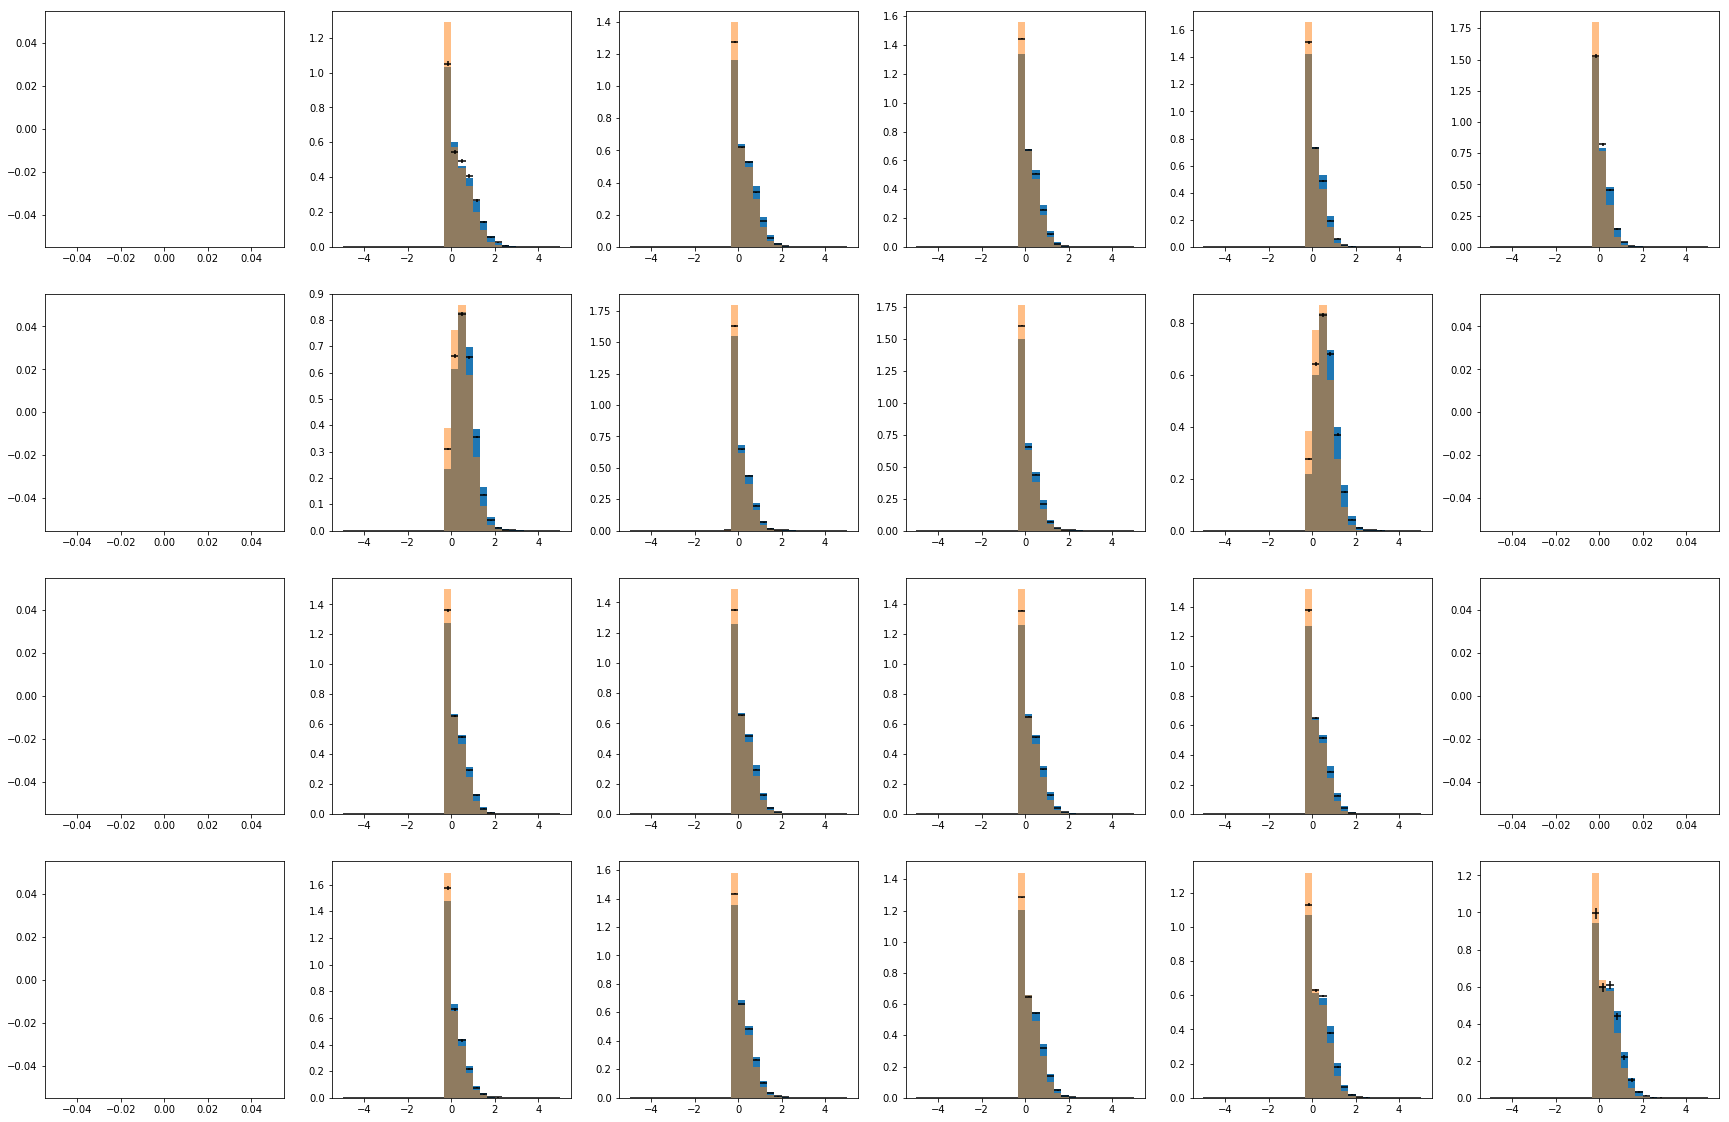

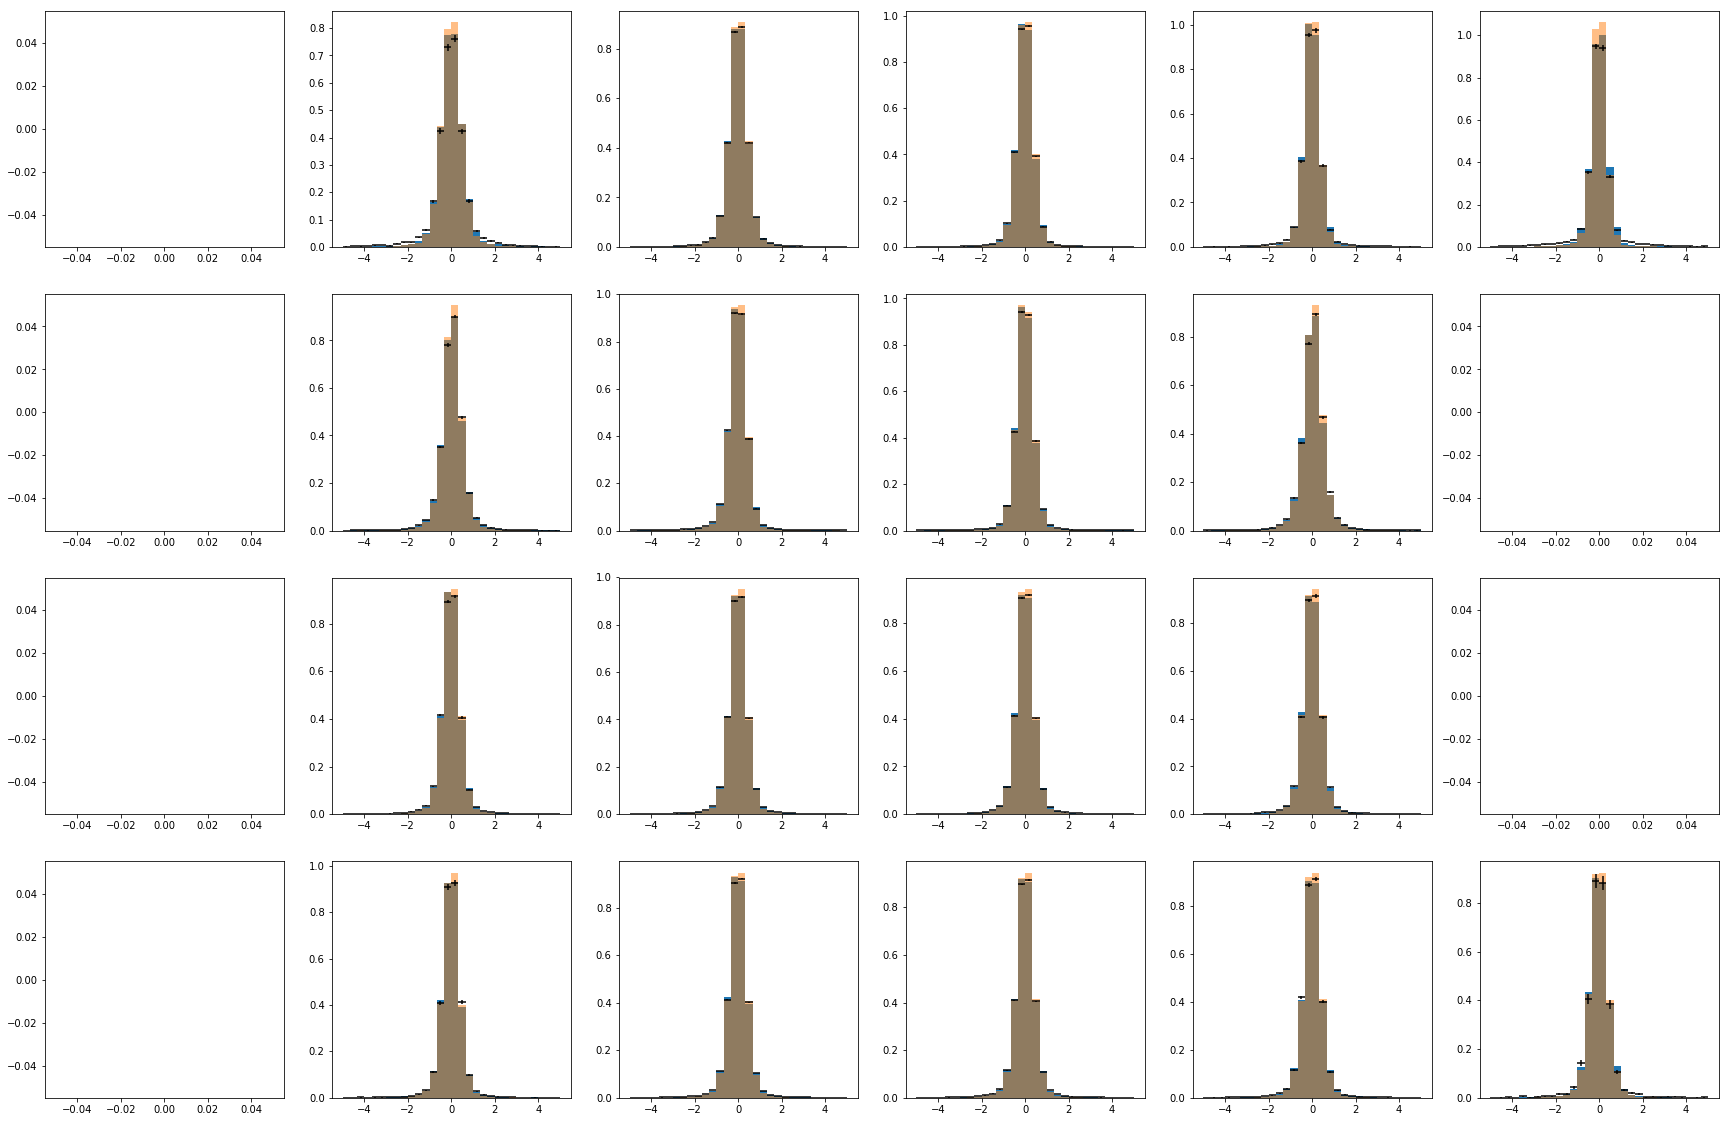

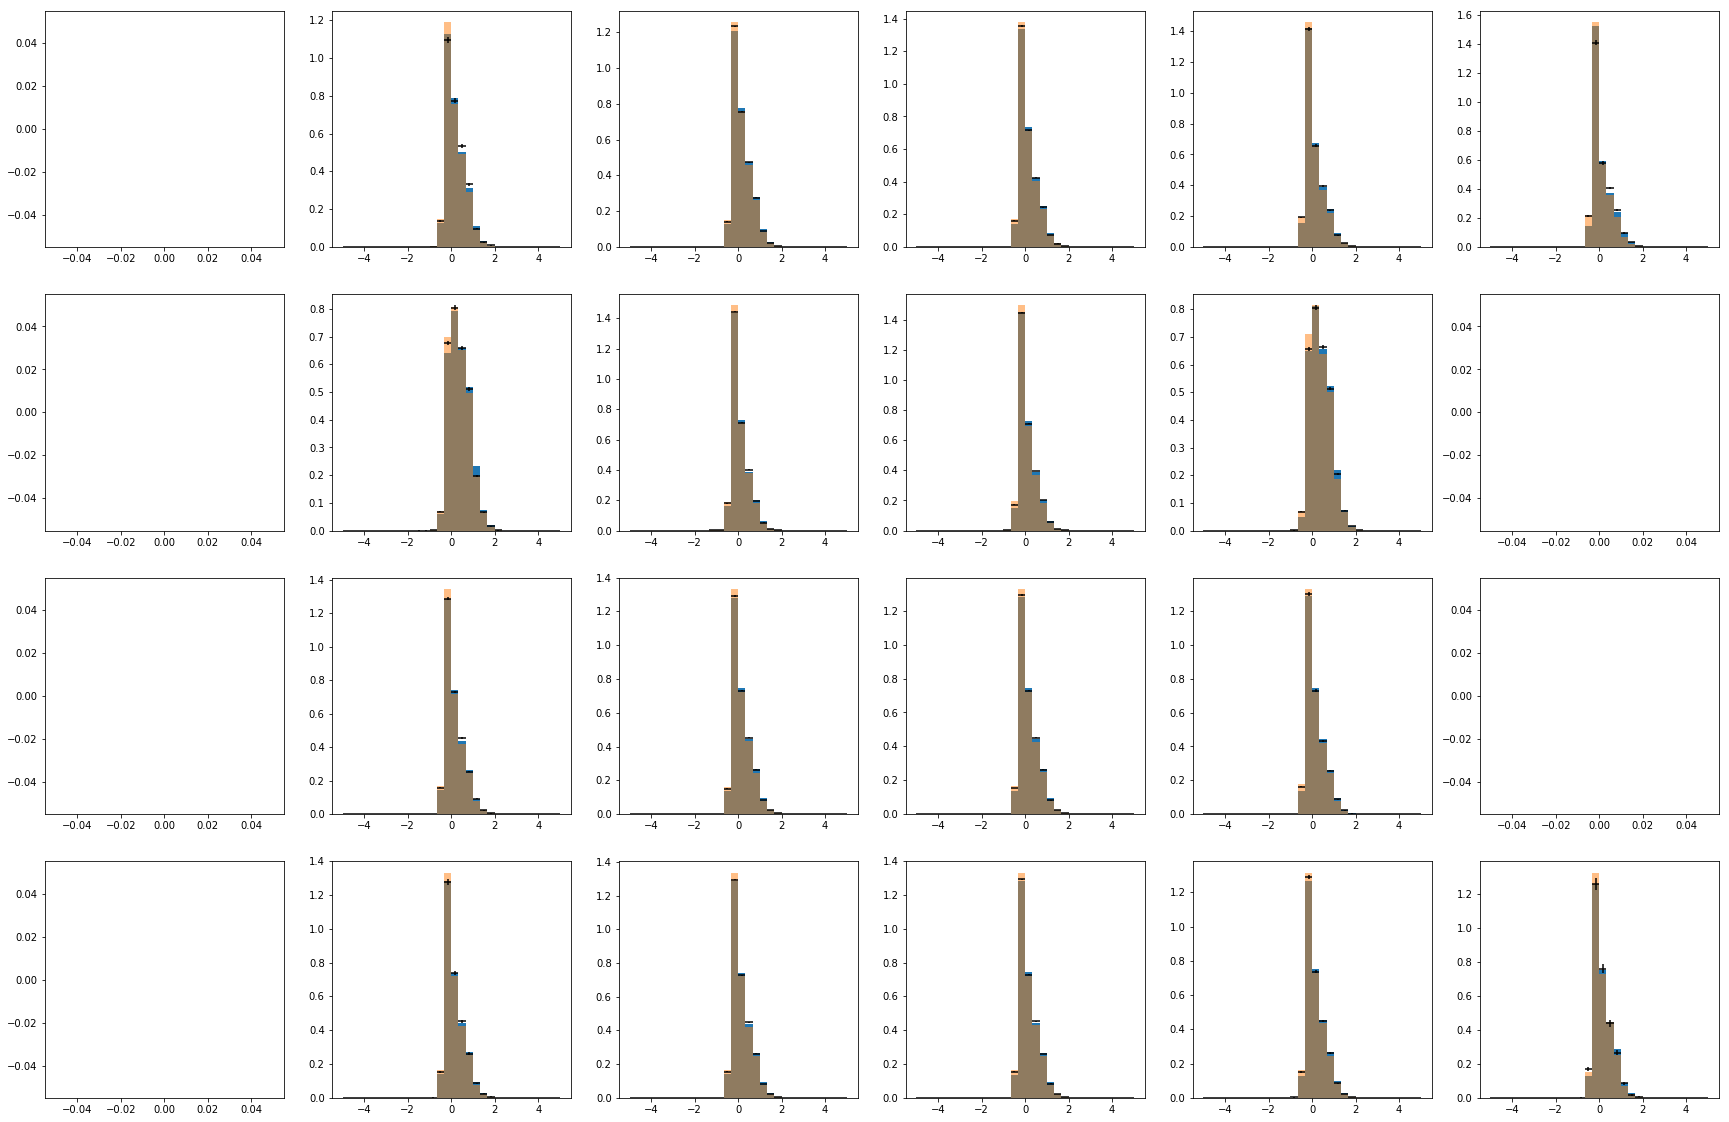

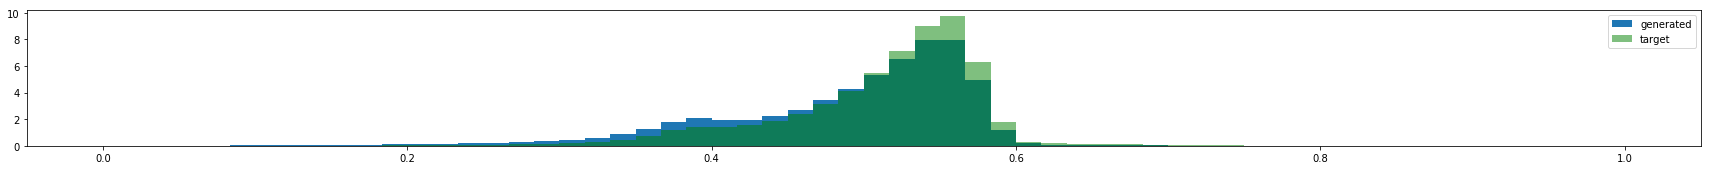

1314015/1314015 [==============================] - 147s - loss: 2.8211 - generator_loss: 1.4576 - generator_model_2_loss: 0.7330 - generator_D_256x5_output_loss: 0.7246 - discriminator_loss: 1.3635 - discriminator_model_2_loss: 0.6824 - discriminator_D_256x5_output_loss: 0.6811   
Epoch 2/10
1314015/1314015 [==============================] - 15s - loss: 2.8213 - generator_loss: 1.4579 - generator_model_2_loss: 0.7333 - generator_D_256x5_output_loss: 0.7246 - discriminator_loss: 1.3635 - discriminator_model_2_loss: 0.6823 - discriminator_D_256x5_output_loss: 0.6811    
Epoch 3/10
1314015/1314015 [==============================] - 14s - loss: 2.8212 - generator_loss: 1.4578 - generator_model_2_loss: 0.7331 - generator_D_256x5_output_loss: 0.7247 - discriminator_loss: 1.3635 - discriminator_model_2_loss: 0.6825 - discriminator_D_256x5_output_loss: 0.6809    
Epoch 4/10
1314015/1314015 [==============================] - 15s - loss: 2.8210 - generator_loss: 1.4575 - generator_model_2_loss: 

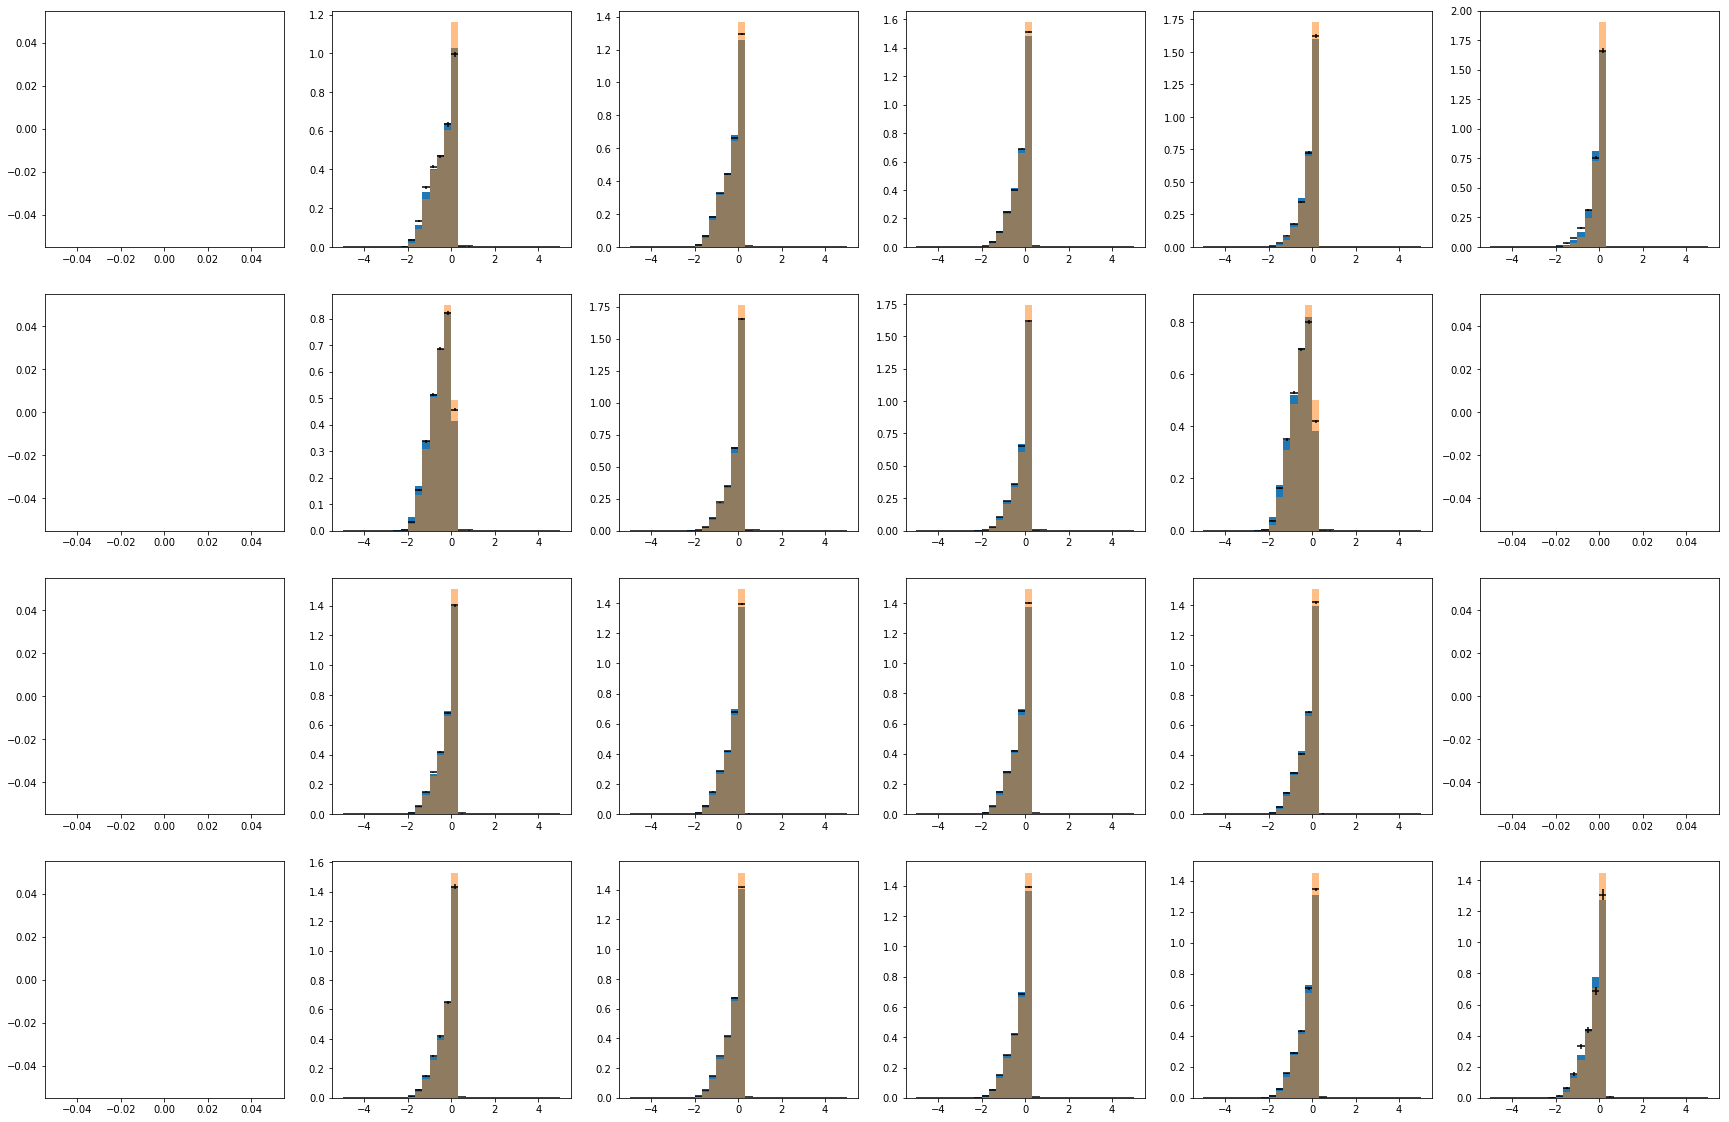

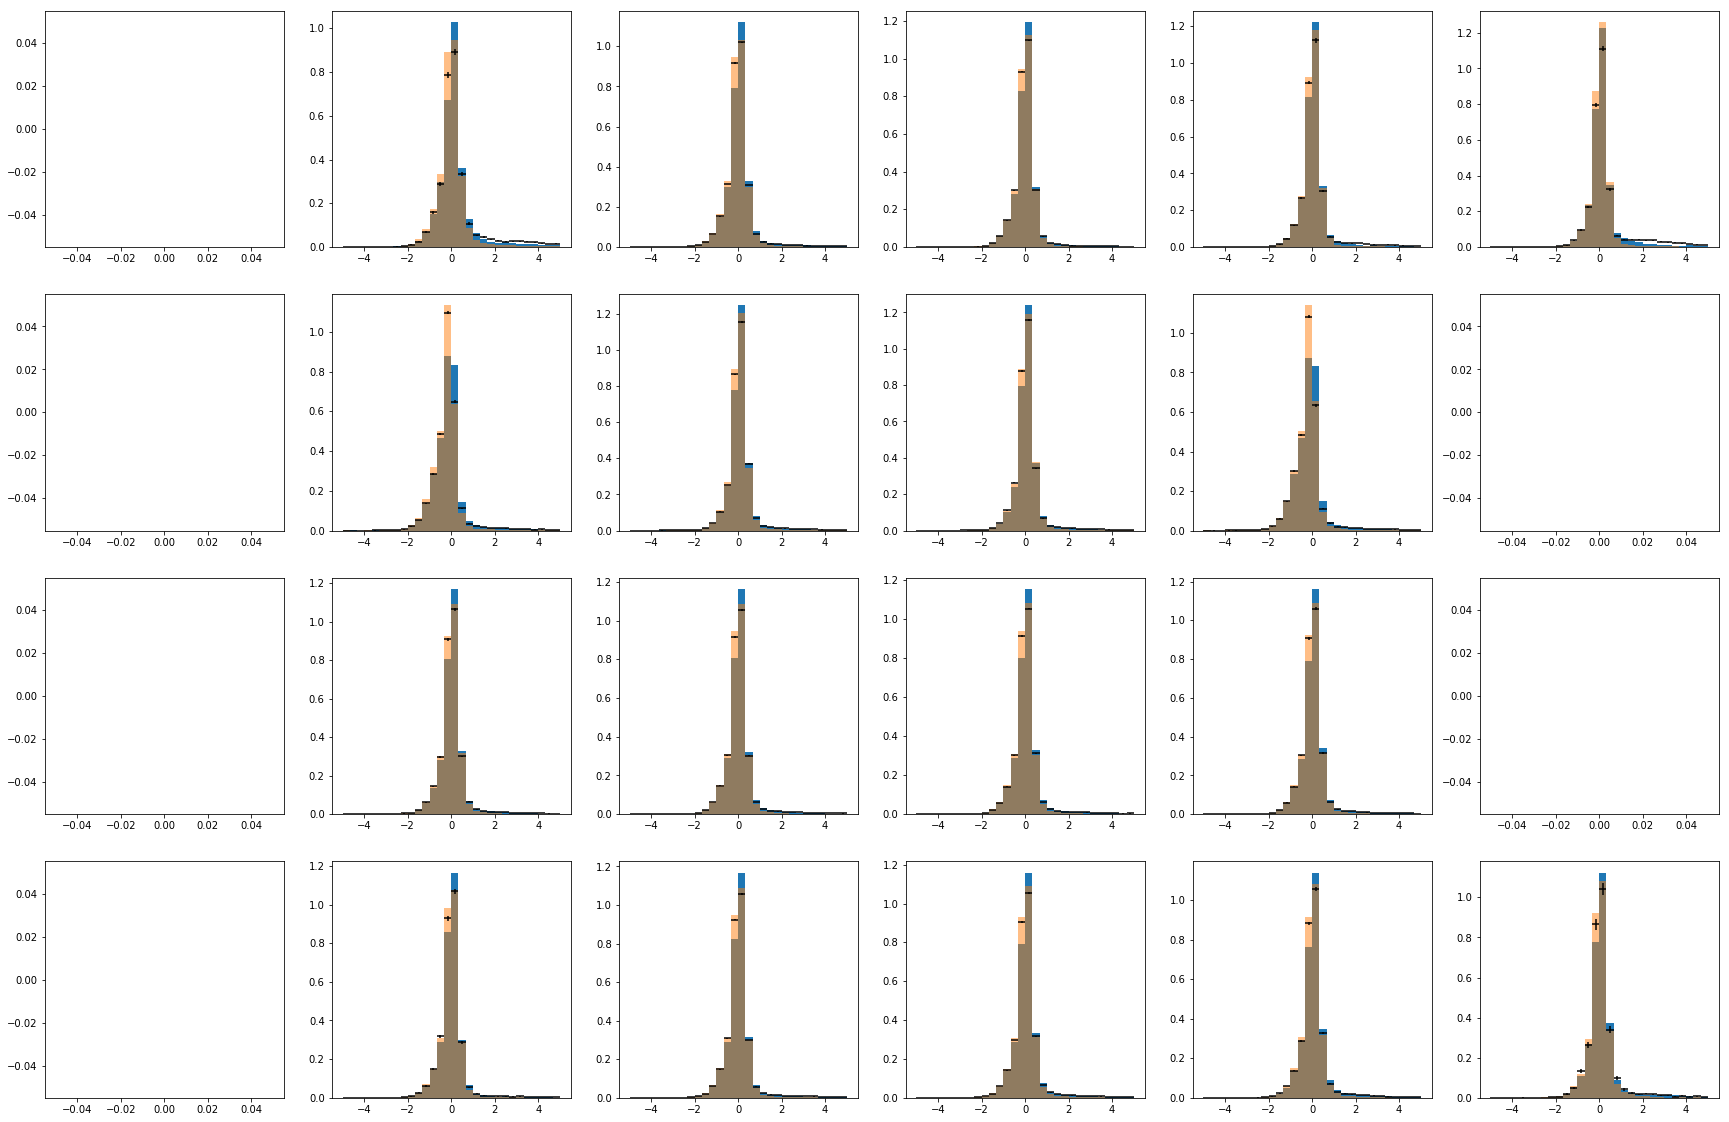

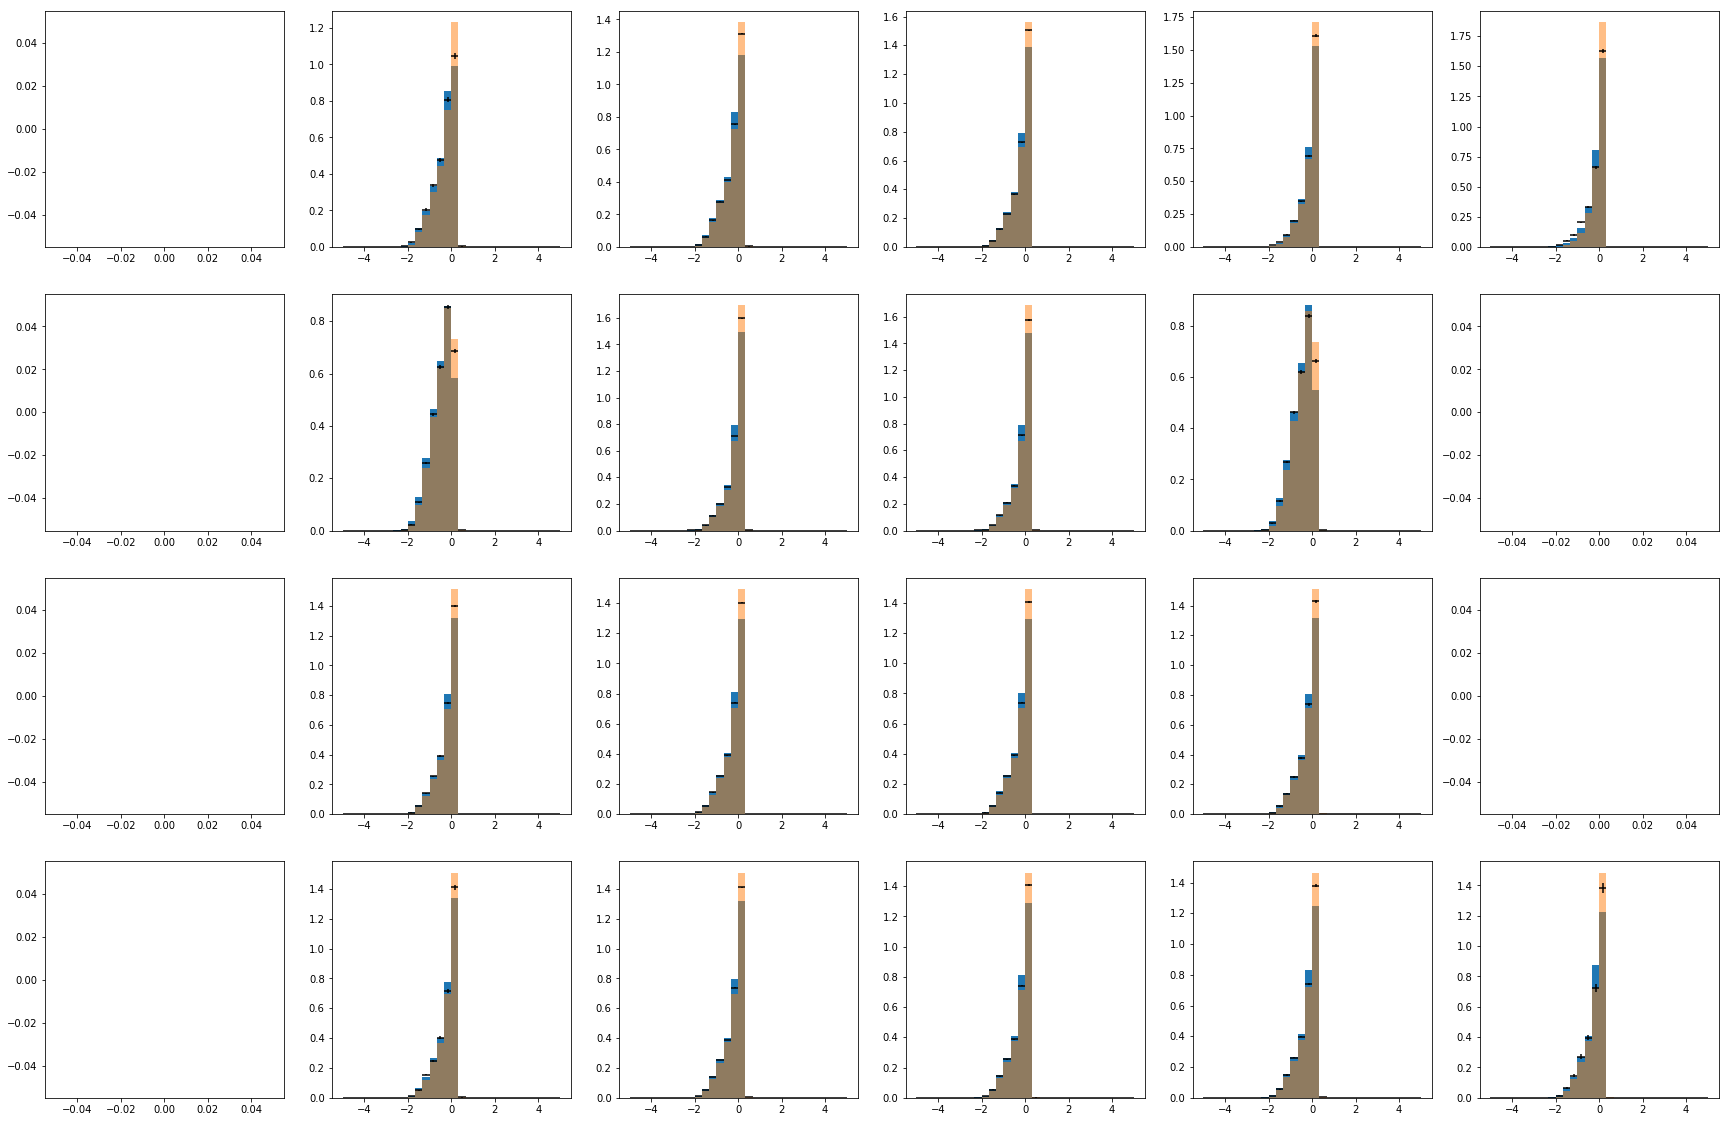

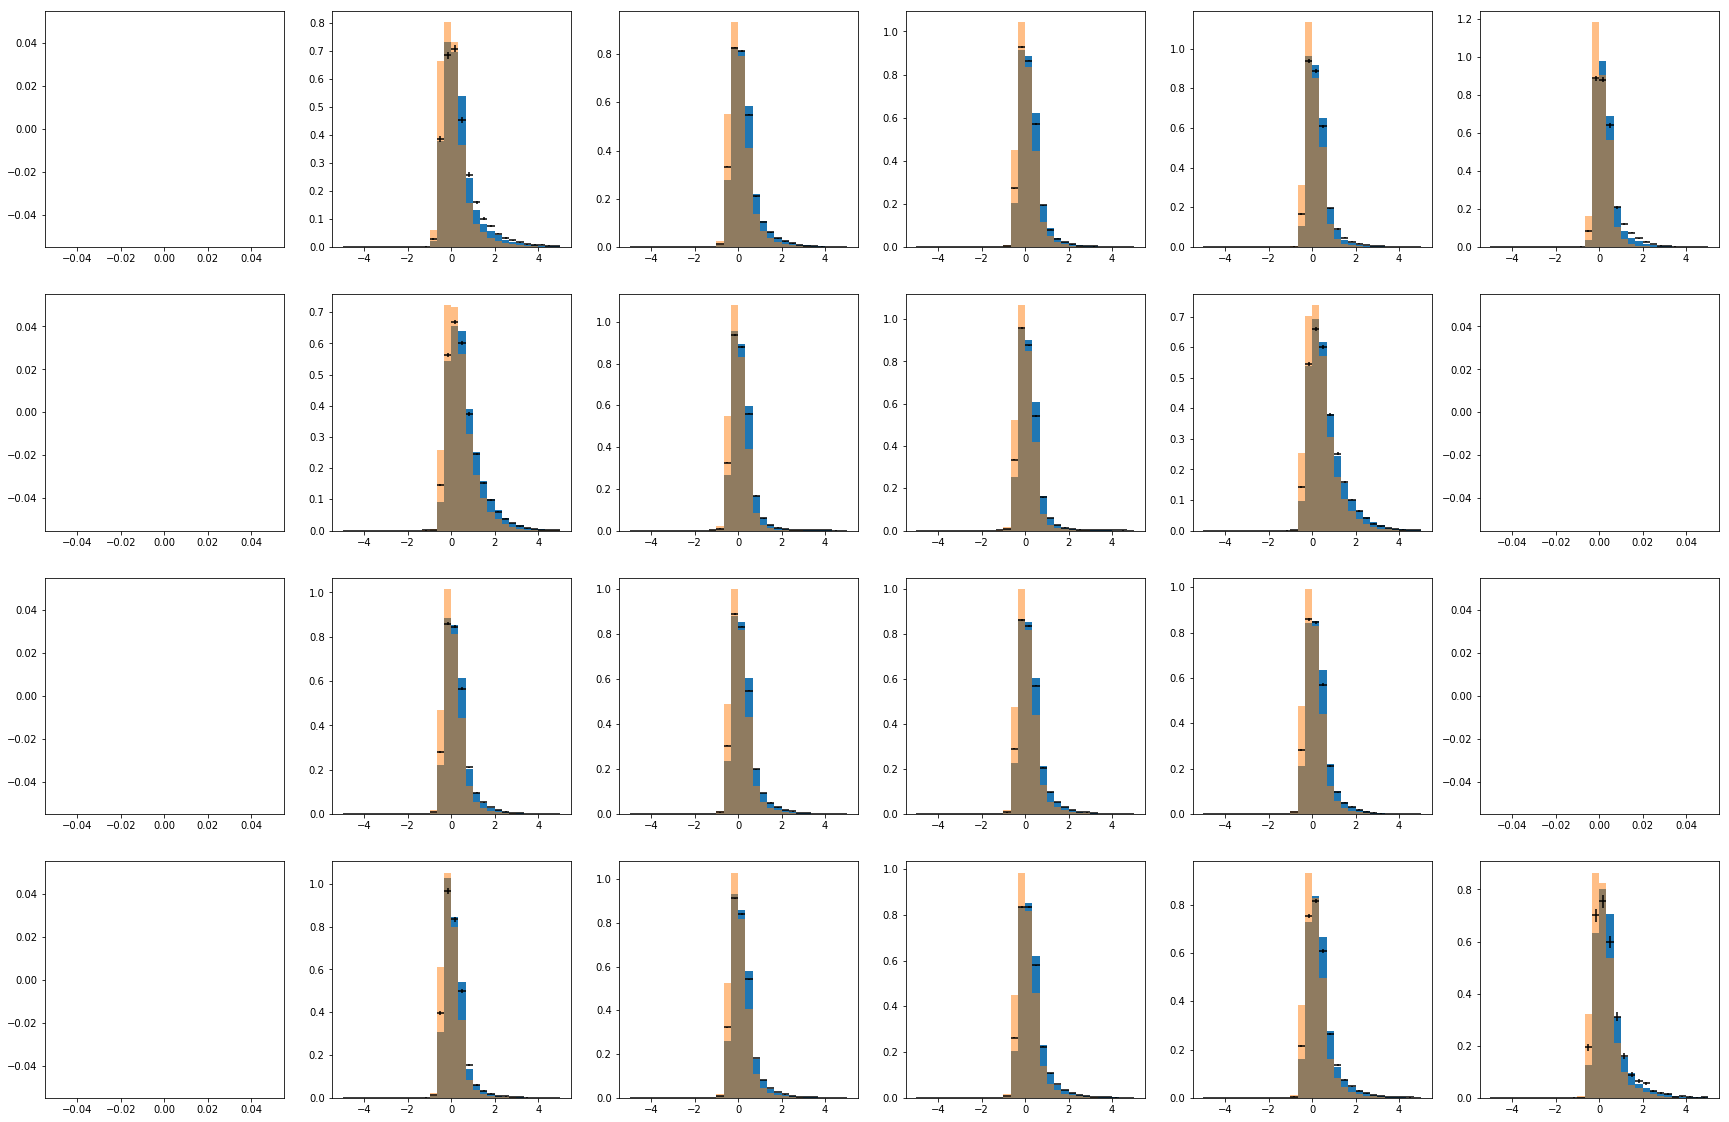

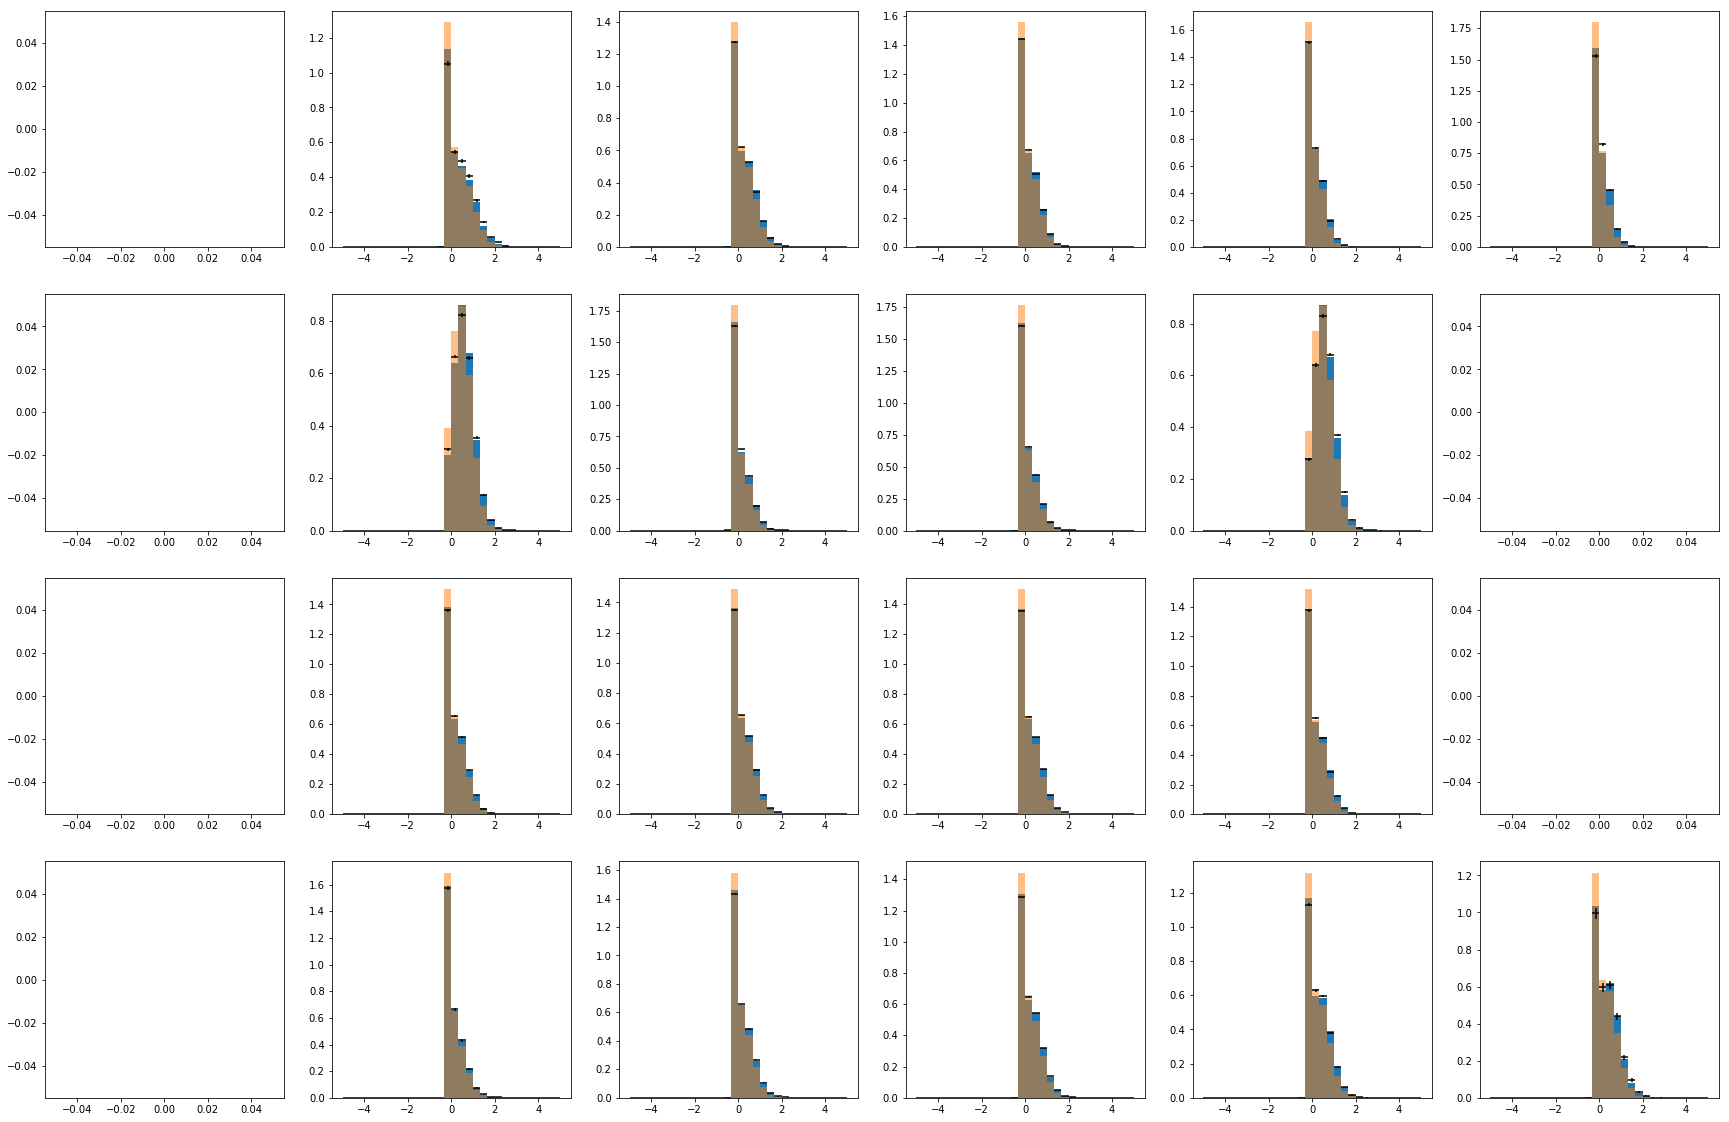

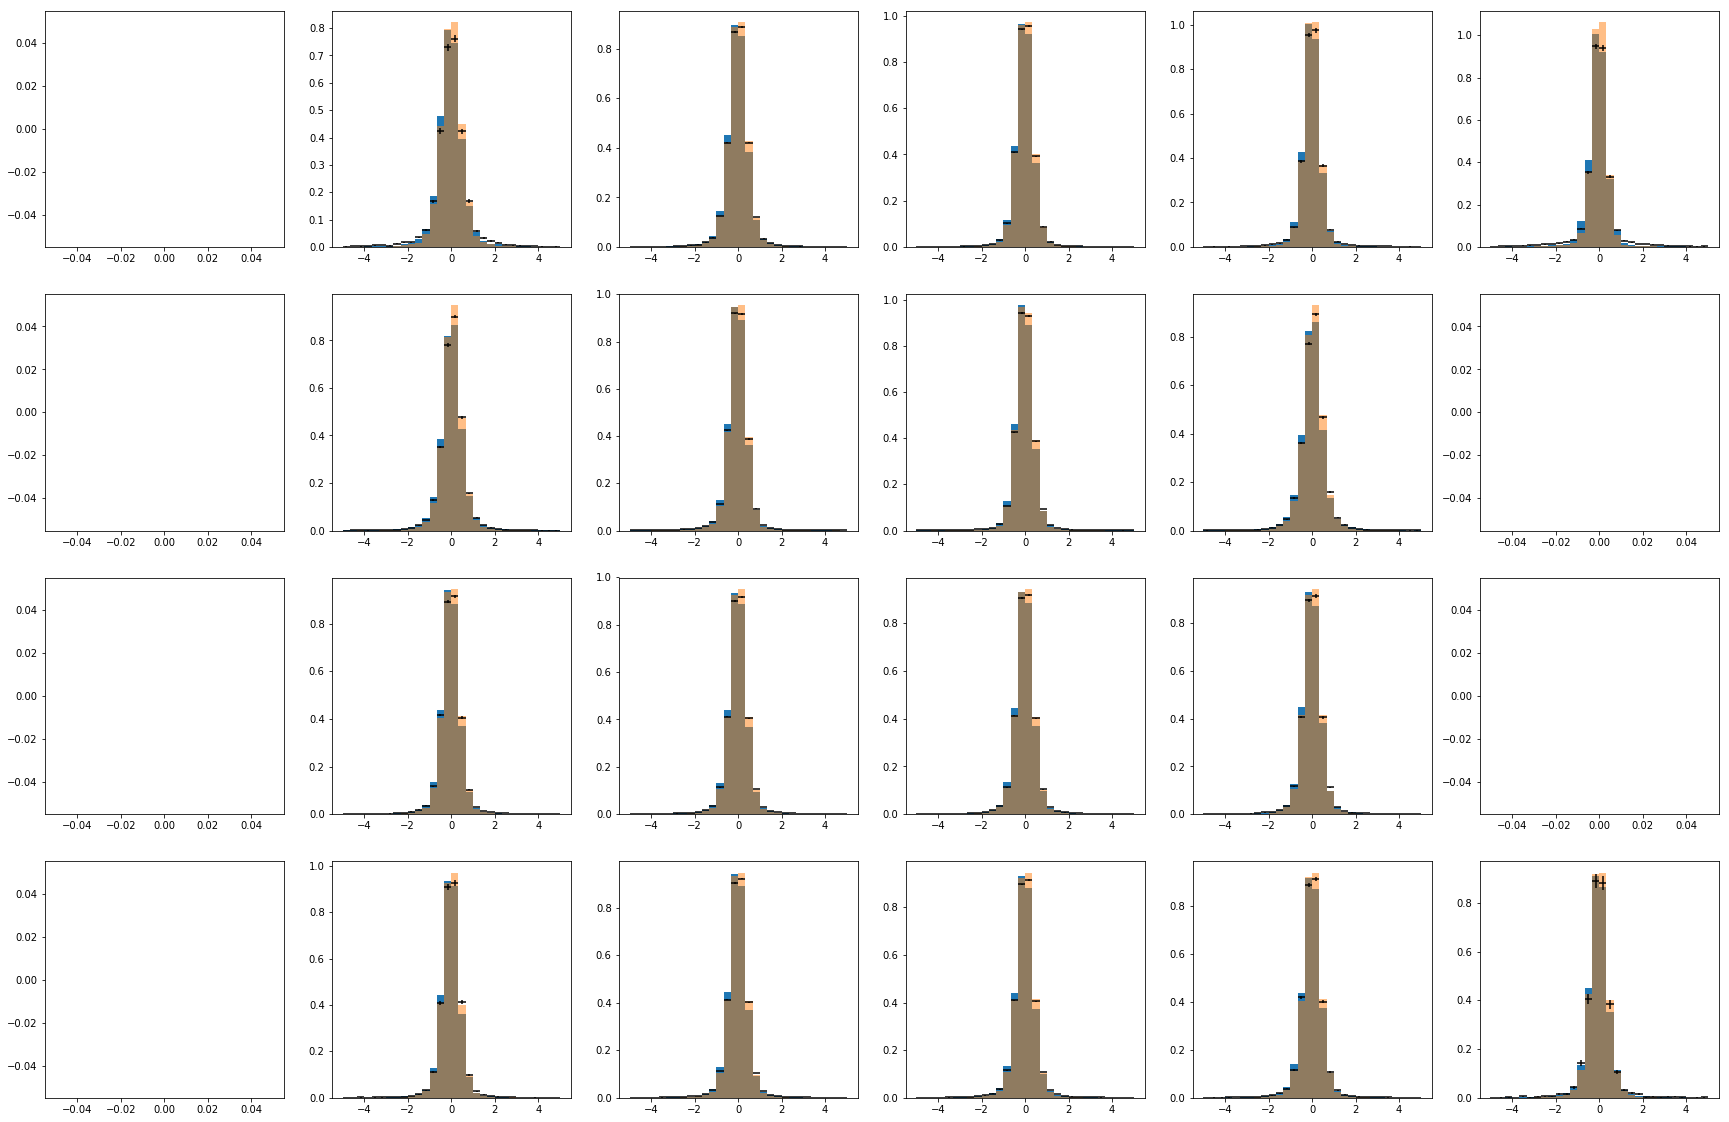

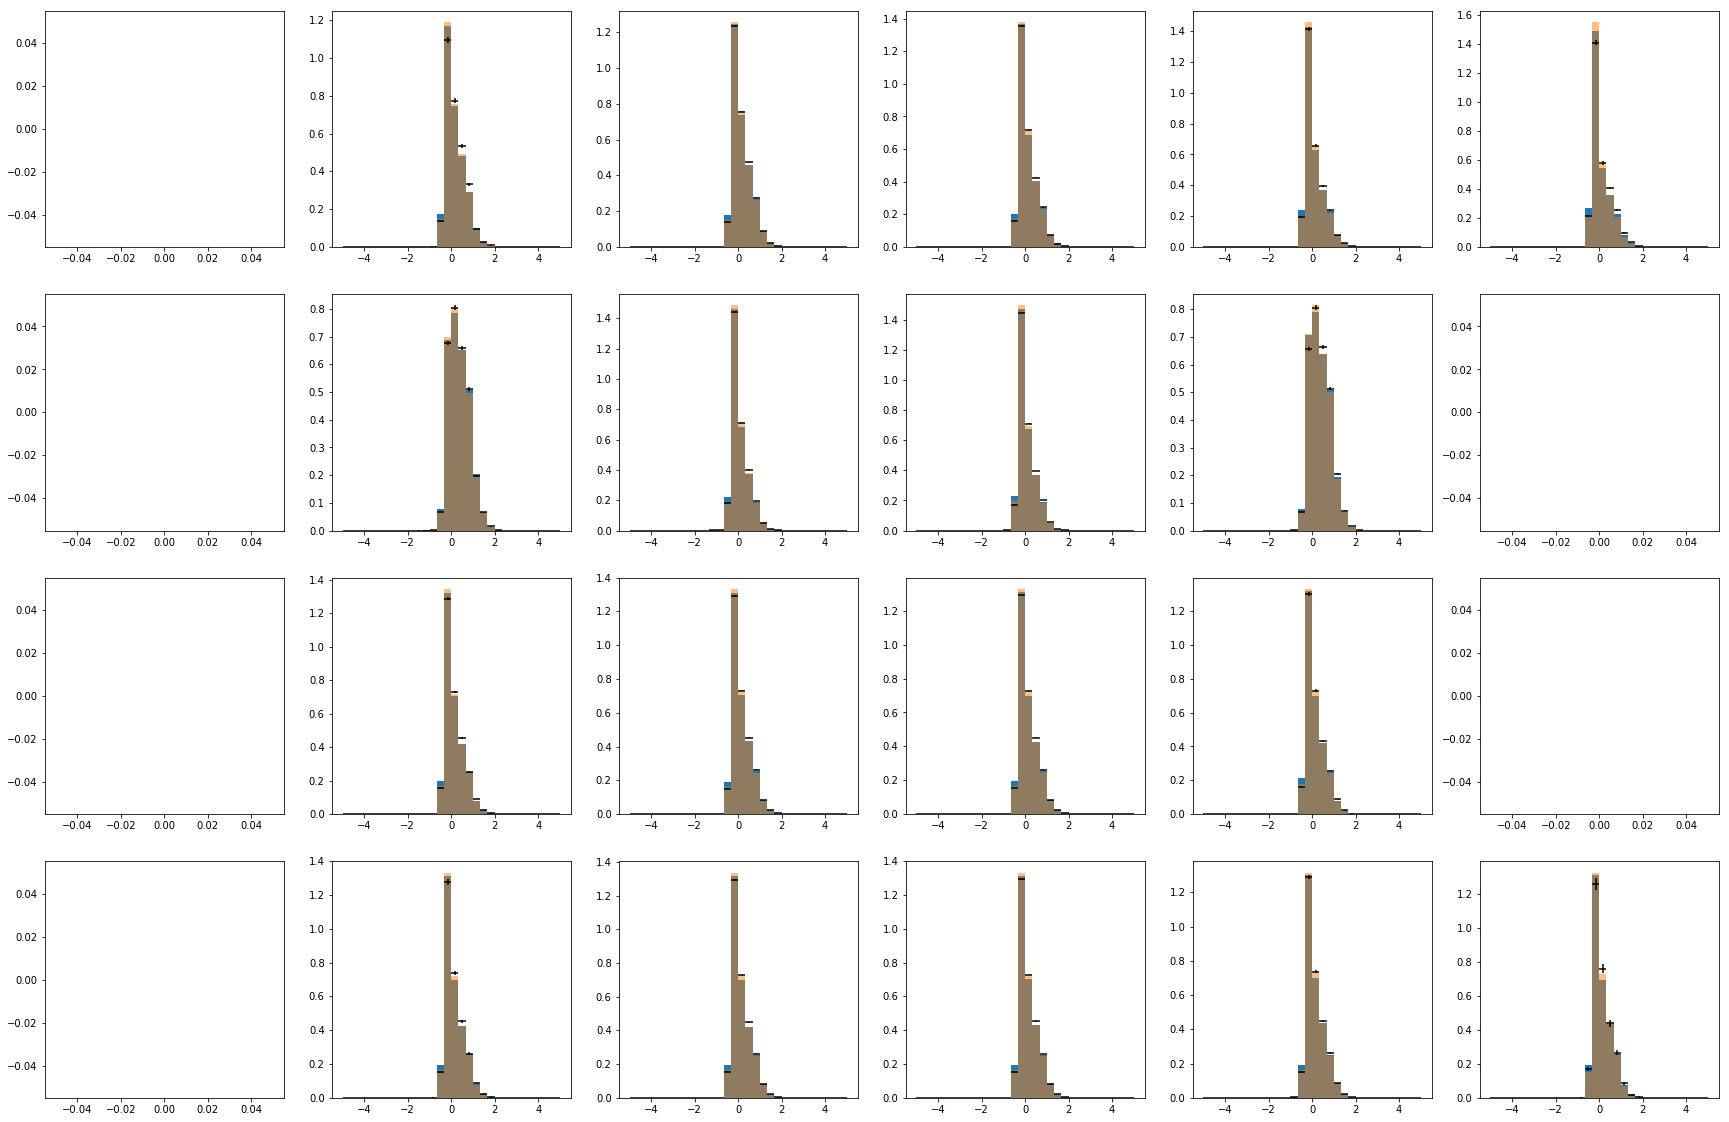

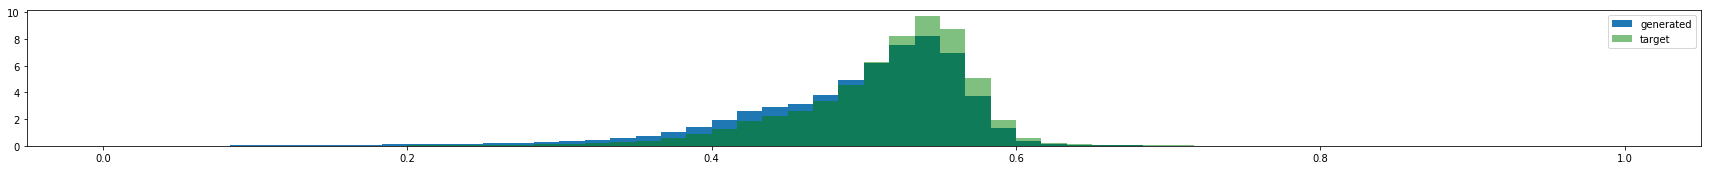

1314015/1314015 [==============================] - 154s - loss: 2.8211 - generator_loss: 1.4576 - generator_model_2_loss: 0.7334 - generator_D_256x5_output_loss: 0.7243 - discriminator_loss: 1.3635 - discriminator_model_2_loss: 0.6825 - discriminator_D_256x5_output_loss: 0.6810   
Epoch 7/10
1314015/1314015 [==============================] - 16s - loss: 2.8210 - generator_loss: 1.4576 - generator_model_2_loss: 0.7333 - generator_D_256x5_output_loss: 0.7243 - discriminator_loss: 1.3635 - discriminator_model_2_loss: 0.6825 - discriminator_D_256x5_output_loss: 0.6810    
Epoch 8/10
1314015/1314015 [==============================] - 16s - loss: 2.8216 - generator_loss: 1.4583 - generator_model_2_loss: 0.7339 - generator_D_256x5_output_loss: 0.7244 - discriminator_loss: 1.3633 - discriminator_model_2_loss: 0.6822 - discriminator_D_256x5_output_loss: 0.6811    
Epoch 9/10
1314015/1314015 [==============================] - 17s - loss: 2.8218 - generator_loss: 1.4586 - generator_model_2_loss: 

In [27]:
import base
reload(base)

do = dict(
    x_train=data_x_train,
    z_train=mc_x_train,
    c_x_train=data_c_train,
    c_z_train=mc_c_train,
          
    x_test=data_x_test,
    z_test=mc_x_test,
    c_x_test=data_c_test,
    c_z_test=mc_c_test,
    
    n_epochs=10,batch_size=4096)

base.MyGAN.adversarial_fit(gan,**do)

# do.update(dict(n_disc_steps=2))
# gan.fit(**do)

# do.update(dict(n_disc_steps=3))
# gan.fit(**do)

# do.update(dict(n_disc_steps=5))
# gan.fit(**do)

In [29]:
mc_x_morphed = gan.get_generator().predict([mc_c_test,mc_x_test])[1]

data_p = gan.get_discriminator().predict([data_c_test,data_x_test])
mc_p   = gan.get_discriminator().predict([mc_c_test,mc_x_morphed])

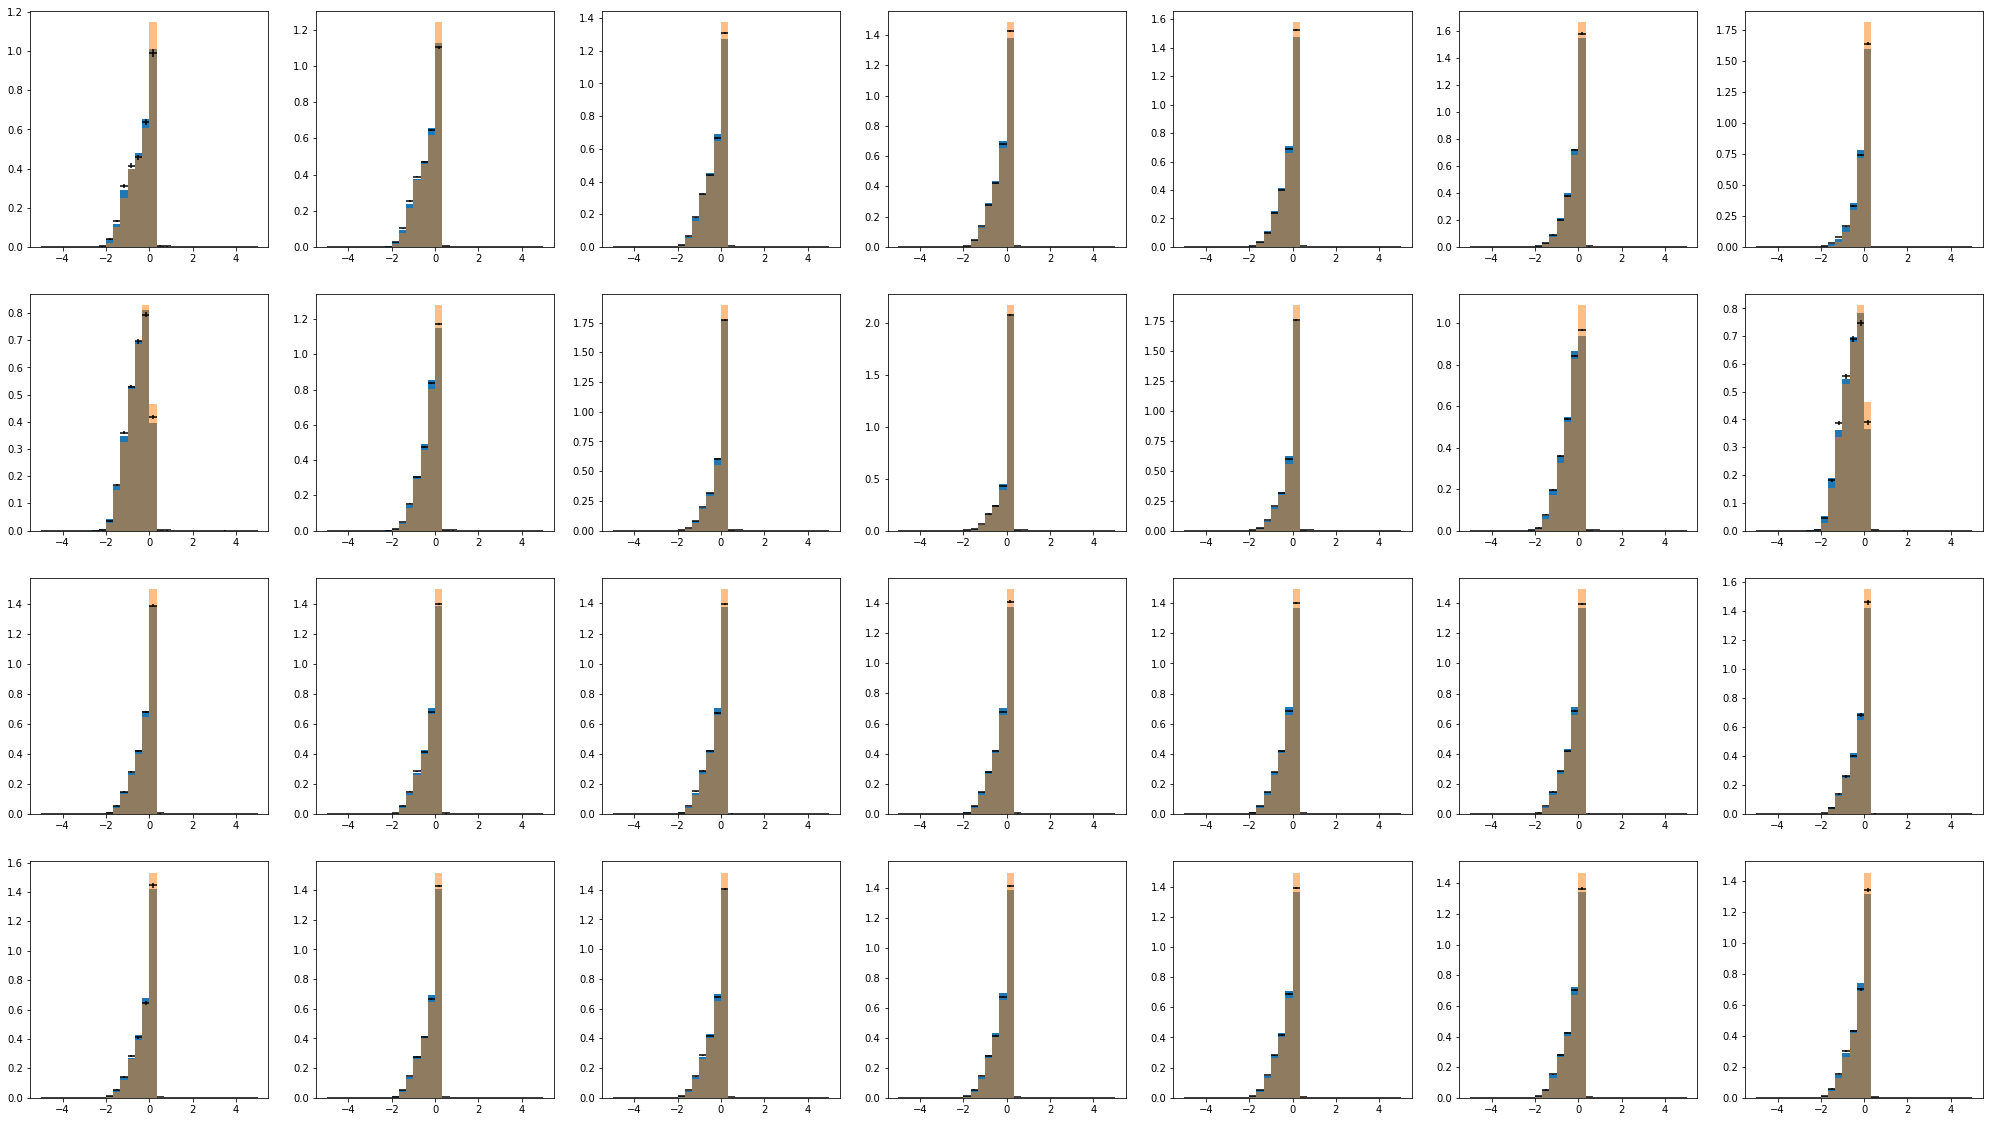

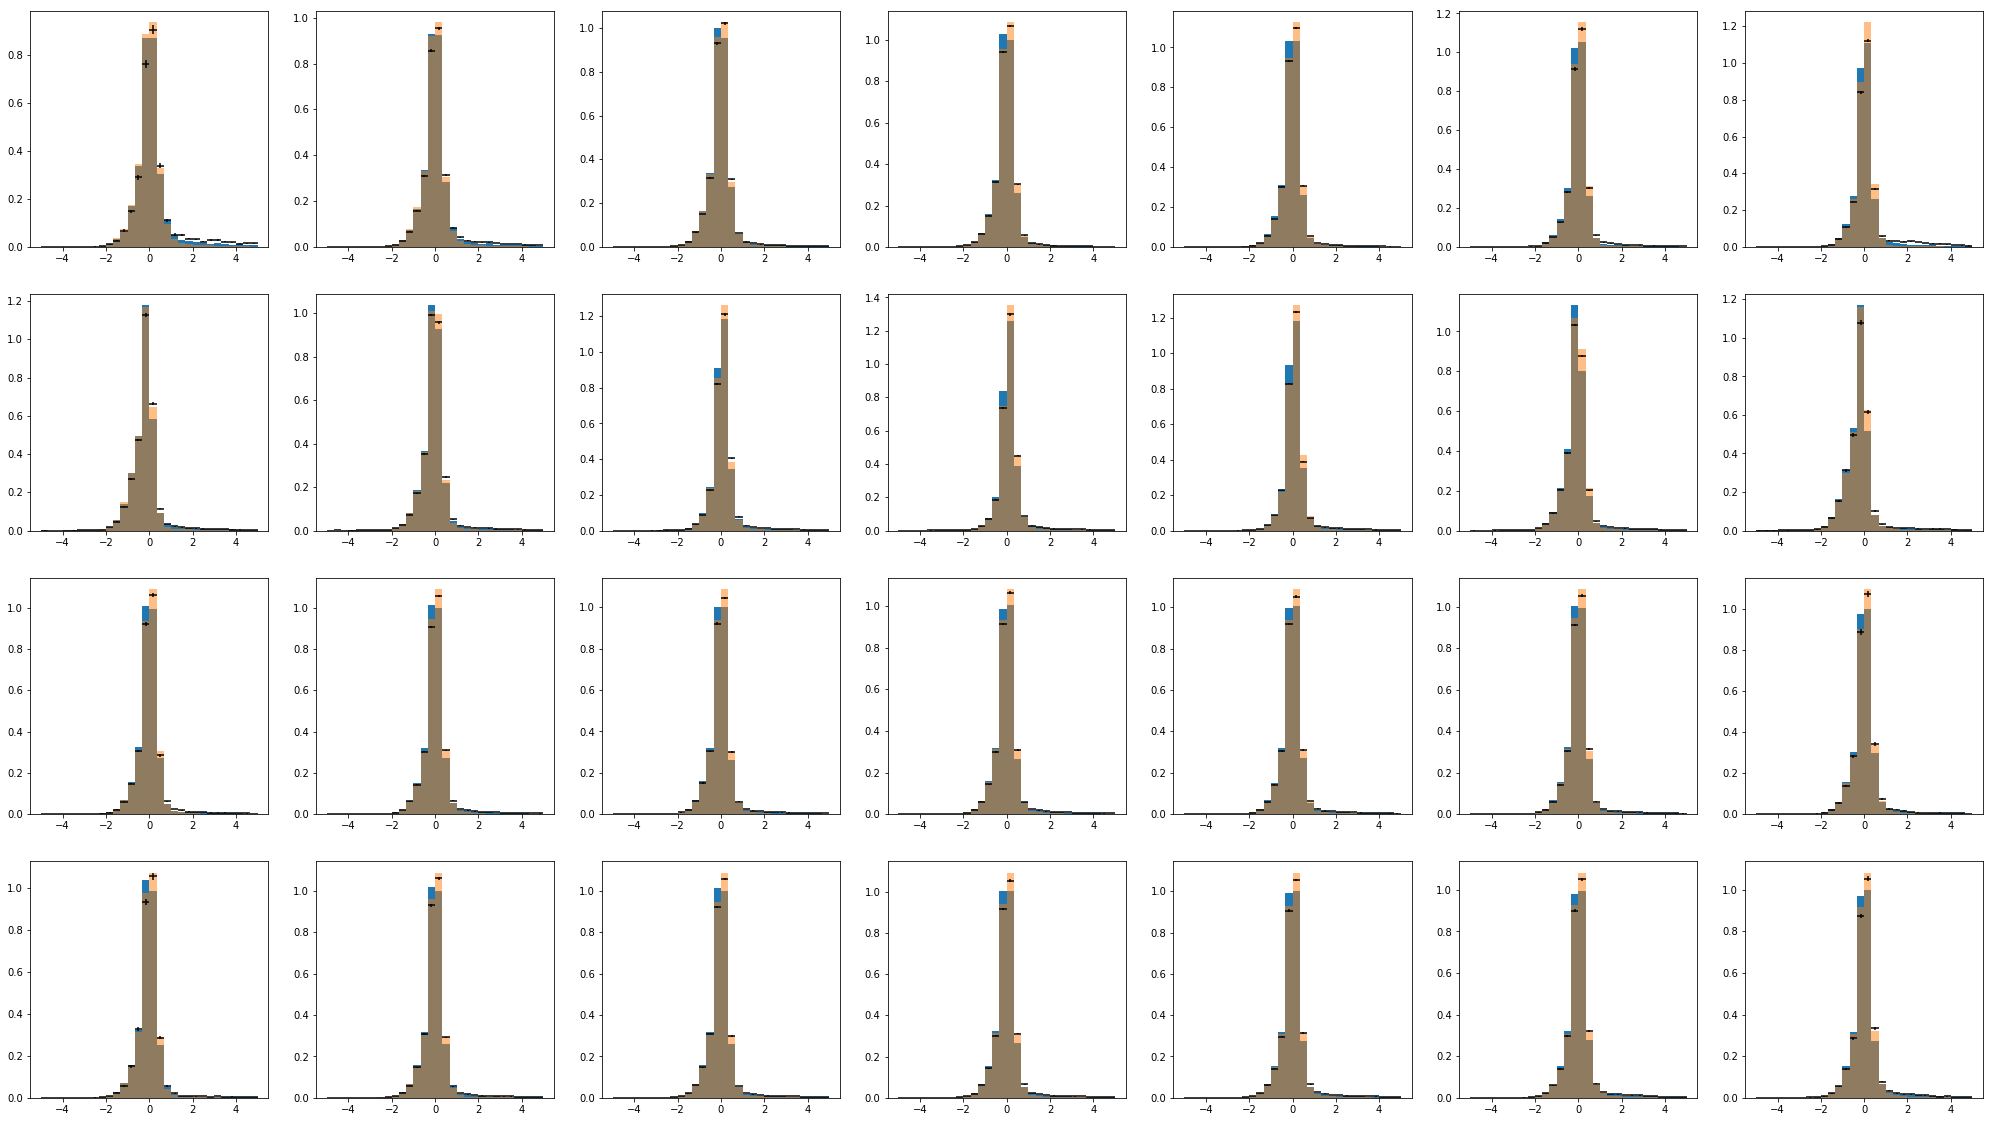

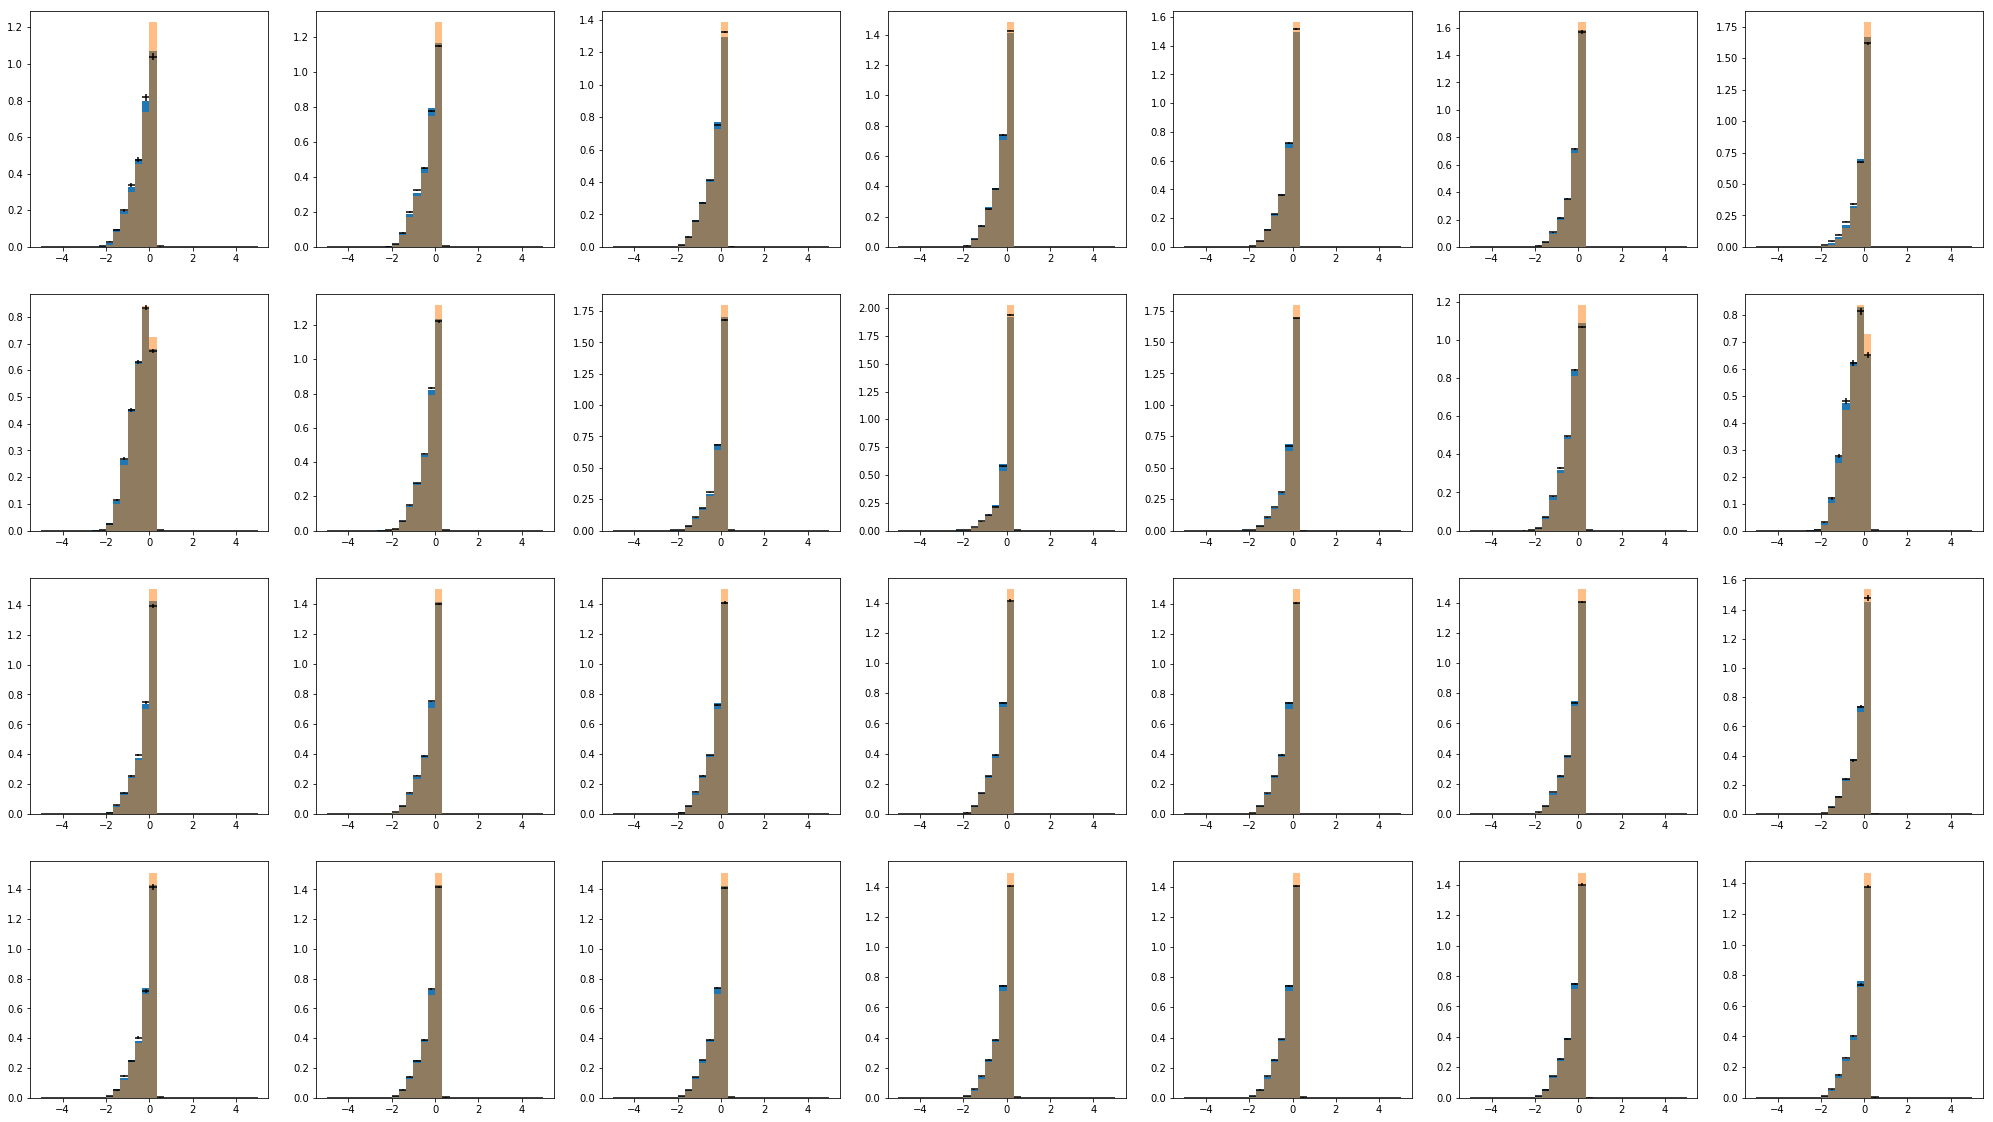

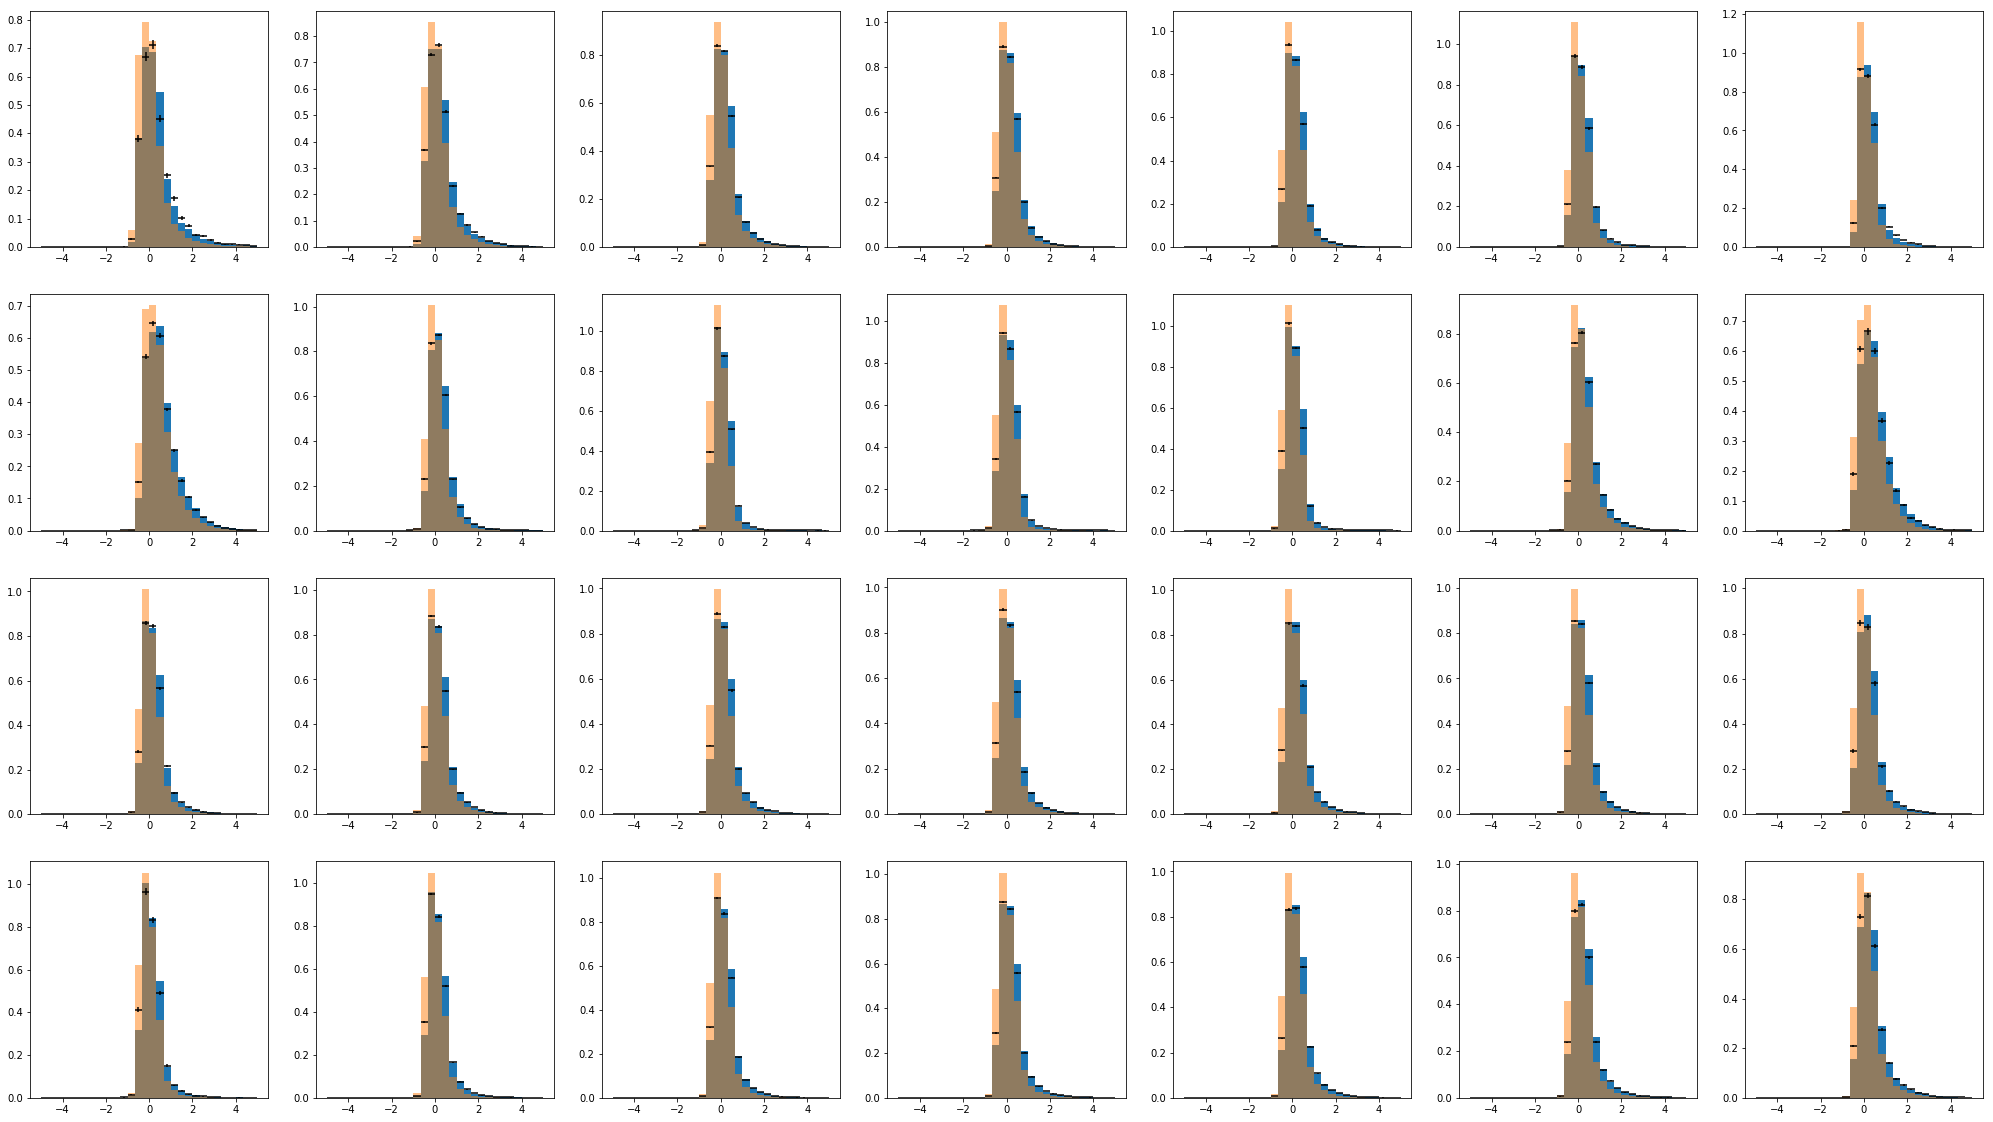

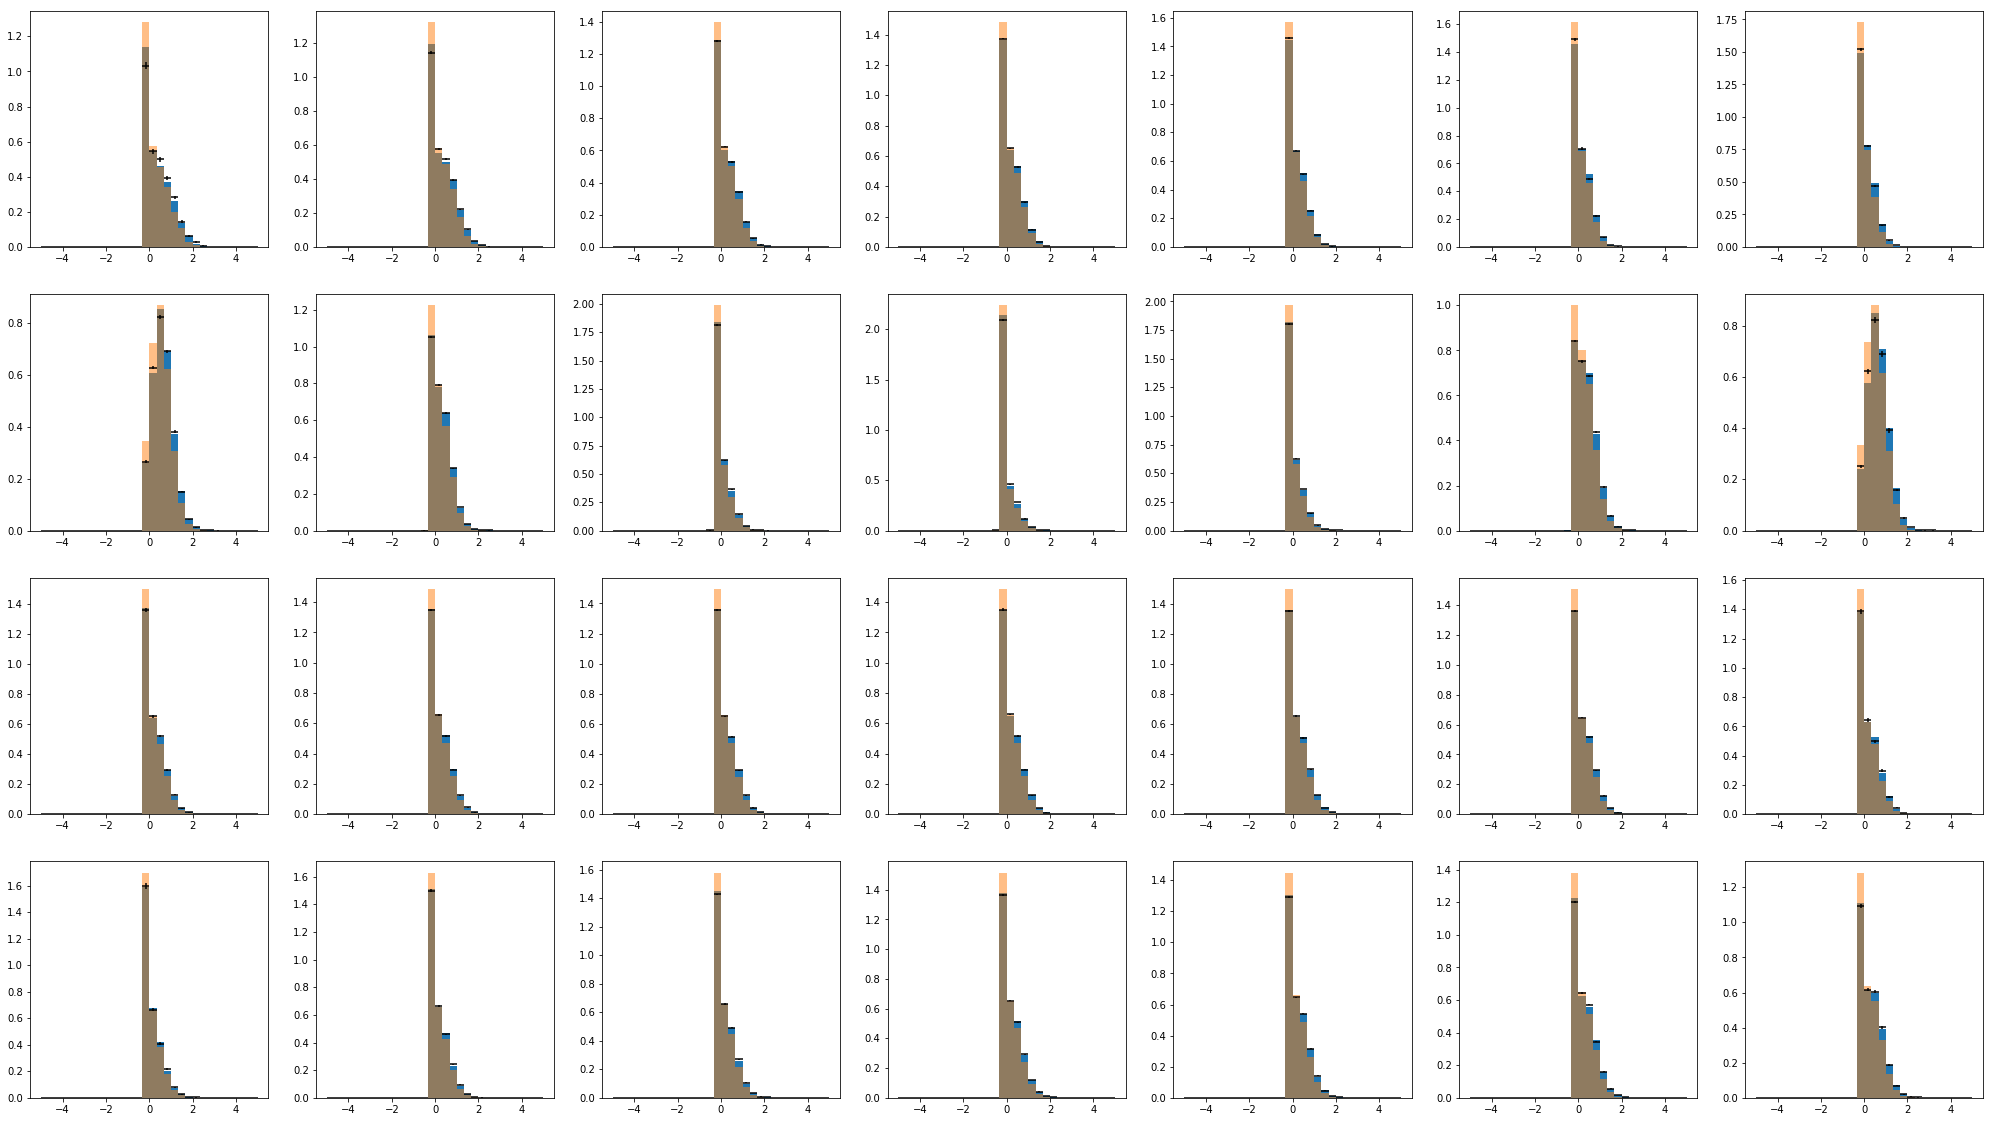

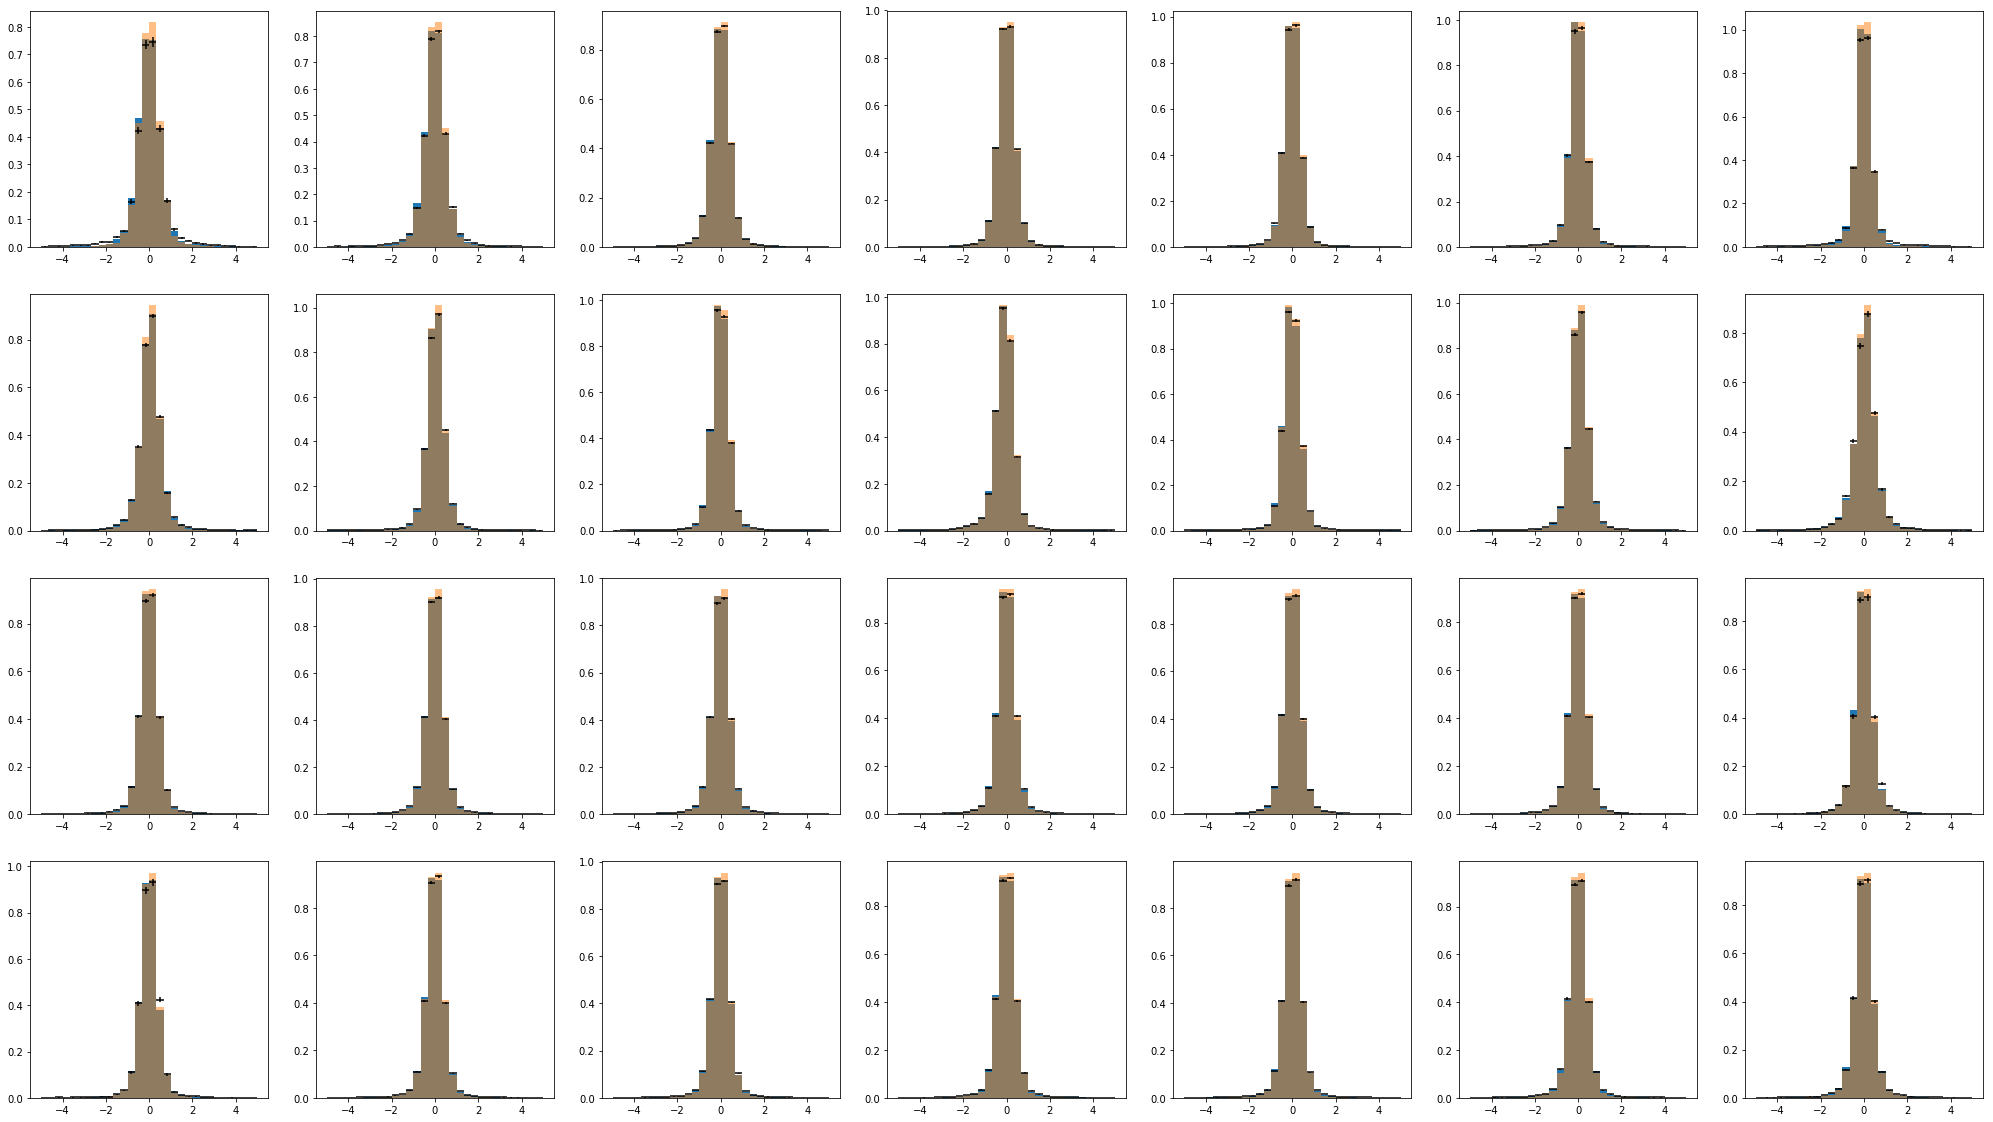

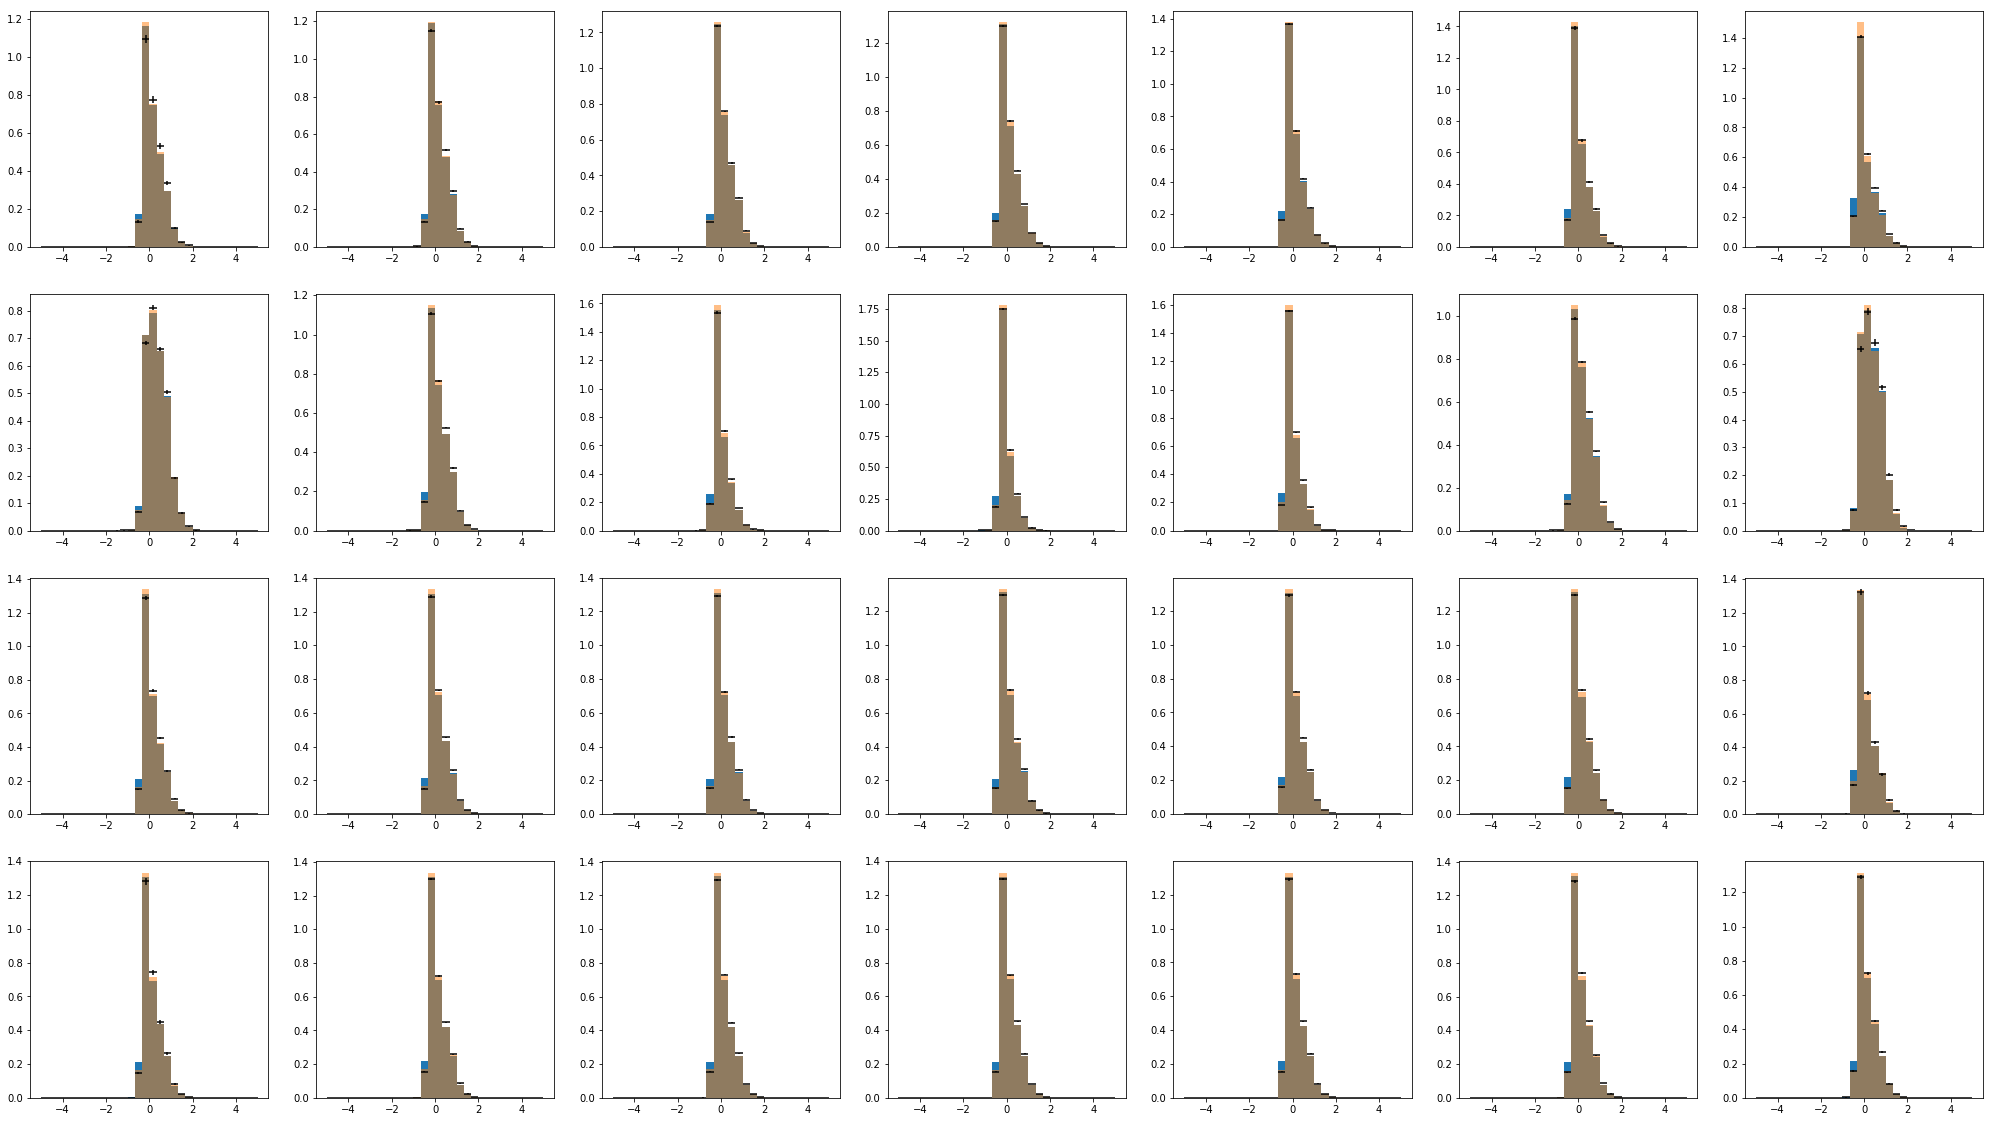

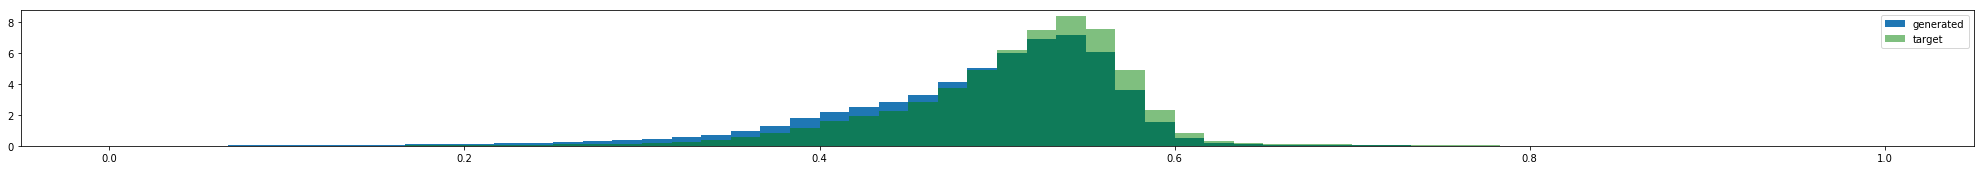

In [32]:
reload(plotting)

data_quantiles = np.percentile(data_c_test,[0,5,20,40,60,80,95,100])

# plotting.plot_summary_cond(data_x_test,data_c_test,mc_x_test,mc_c_test,mc_x_test,data_p,mc_p)
# plotting.plot_summary_cond(data_x_test,data_c_test,mc_x_morphed,mc_c_test,mc_x_test,data_p,mc_p)
plotting.plot_summary_cond(data_x_test,data_c_test,mc_x_morphed,mc_c_test,mc_x_test,data_p,mc_p,
                           do_slices=True,c_bounds=data_quantiles)
